In [4]:
### IMPORT SCIENTIFIC LIBRARIES ###
import numpy as np
import pandas as pd
from scipy import sparse
from scipy.optimize import curve_fit
import lmfit as lm
from tqdm import tqdm


import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
import sys, importlib

import sys
sys.path.append('./XPCSlibrary/')

import ID10_tools as ID10
from ID10_tools import Nx, Ny, Npx
importlib.reload(ID10)
ID10.set_version('v2')

import XPCS_tools as XPCS
from XPCS_tools import E2lambda, lambda2E, theta2Q, Q2theta, decorrelation_f
importlib.reload(XPCS)
XPCS.set_beamline('ID10')

import COSMICRAY_tools as COSMIC
importlib.reload(COSMIC)
COSMIC.set_beamline('ID10')

### EXPERIMENTAL VARIABLES ###
XPCS.set_expvar(Nx//2, Ny//2, 5)
ID10.Nfmax_dense_file = 2000
ID10.Nfmax_sparse_file = 5000

from folder_paths import *

In [5]:
#######################################
sample_name = 'Ta2O5_2.5um_asdep'
Ndataset = 1
Nscan = 2
#######################################

scan = ID10.load_scan(RAW_folder, sample_name, Ndataset, Nscan)

scan

{'command': 'ascan zs 1.2934785 4.2934785 60 0.2',
 'start_time': '2025-05-28T18:14:56.623858+02:00',
 'end_time': '2025-05-28T18:17:12.341511+02:00',
 'monoe': np.float64(21.669991317784486),
 'ch2_saxs': array([-5.59482077e-11, -6.22363466e-11, -4.73406307e-12, -5.47267638e-11,
        -3.38754015e-11, -4.78765388e-11, -2.99702663e-11, -1.23304619e-11,
        -8.81917918e-11, -1.64881238e-11, -1.72181386e-11,  3.42792669e-11,
        -4.96233145e-11, -2.12094560e-11, -6.66809512e-12, -3.48516061e-11,
         9.78365473e-13,  1.82040513e-11,  4.72788520e-11, -1.87862127e-11,
         4.48977493e-11,  2.56135106e-11,  3.28540906e-11,  4.11269571e-11,
        -1.22693105e-11, -6.05225230e-11, -3.19182396e-11, -3.03105597e-11,
        -3.55458171e-11, -2.95910009e-11, -2.73417064e-11, -3.13862541e-11,
        -3.01473836e-11, -6.48858184e-11, -3.91619881e-11, -4.12744049e-11,
        -3.20418098e-11, -6.65853839e-11, -4.18326887e-11, -4.50185819e-11,
        -6.79814104e-11, -7.6804956

In [7]:
plt.plot(scan['zs'], scan['tetramm_diodes'])

KeyError: 'tetramm_diodes'

## Load masks

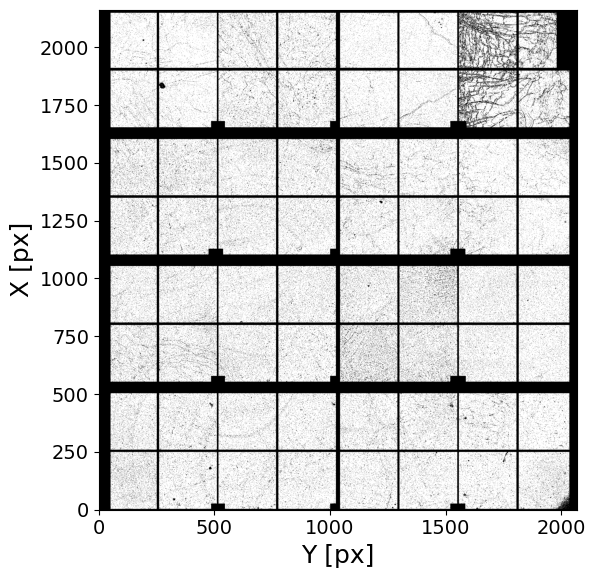

In [2]:
e4m_mask = np.load(MASKS_folder+'e4m_mask'+'.npy')
e4m_htmask = np.load(MASKS_folder+'e4m_htmask_Mo_fluorescence'+'.npy')

plt.figure(figsize=(6, 6))
plt.imshow((e4m_mask*e4m_htmask).reshape(Nx,Ny), cmap='gray', origin='lower')
plt.xlabel('Y [px]')
plt.ylabel('X [px]')
plt.tight_layout(); plt.show()

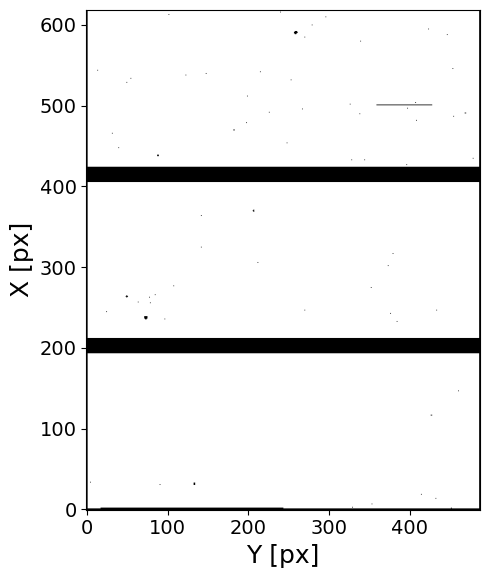

In [3]:
pilatus_mask = np.load(MASKS_folder+'pilatus300k_mask_20240201'+'.npy').astype(bool)

plt.figure(figsize=(6, 6))
plt.imshow(~pilatus_mask, cmap='gray', origin='lower')
plt.xlabel('Y [px]')
plt.ylabel('X [px]')
plt.tight_layout(); plt.show()

## Q mask

In [4]:
###########
Q = 2
dq = 0.01
###########
Q=float(Q)

## XPCS scan: delcoup=10, T=24h (Ta2O5_2.5um, 2, 4)  
Tantala annealed, substarte towards the Eiger, see Kossel lines from Bragg diffraction of Si triggered by duffused scatterng of sample

#############################
command = mtimescan 0.001 2 86000501
Ei = 21.669991317784486
itime = 0.0011
T =  15.707186611111112 h
theta = 10.0
Qc = 1.91
#############################



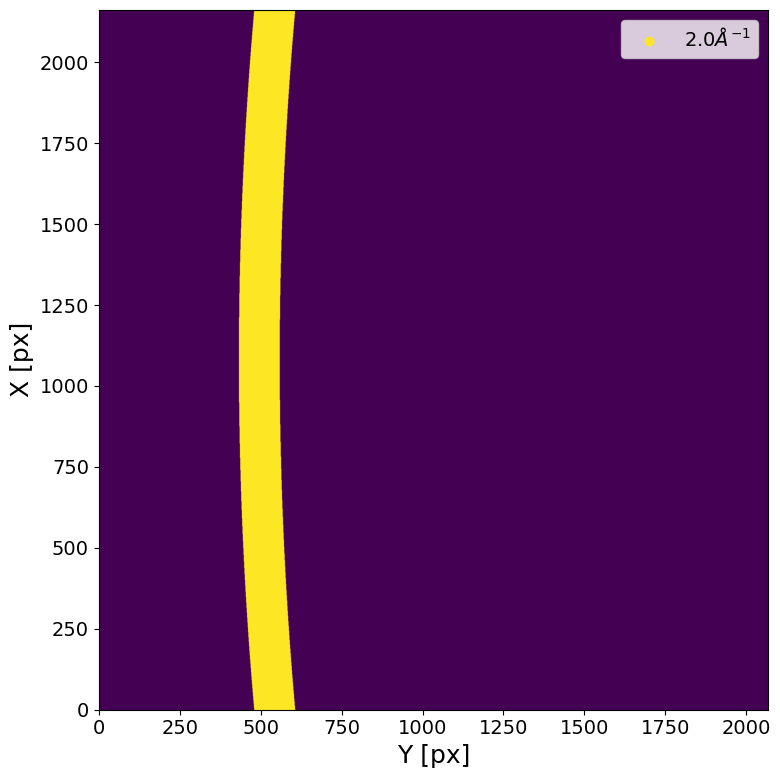

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/10282 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/10282 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/10282 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/10282 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00011.h5 (12/10282 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00008.h5 (9/10282 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/10282 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/10282 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/10282 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00014.h5 (15/10282 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00013.h5 (14/10282 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/10282 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00012.h5 (13/10282 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/10282 loops)
	 ->

Exception ignored in: <function ResourceTracker.__del__ at 0x74b1357a3ce0>
Traceback (most recent call last):
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x71684ef4bce0>
Traceback (most recent call last):
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", li

In [ ]:
#######################################
sample_name = 'Ta2O5_2.5um'
Ndataset = 2
Nscan = 4
#######################################

scan = ID10.load_scan(RAW_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
T = scan['fast_timer_period'].size*itime
theta = scan['delcoup']
Qc = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('T = ', T/60**2, 'h')
print('theta =', theta)
print('Qc =', Qc)
print('#############################\n')

#################################################################################
Nfi, Nff = None, None
Kossel_mask = np.load(MASKS_folder+'Kossel_mask_Ta2O5_2.5um_0002_0004.npy')
Qmask = XPCS.gen_Qmask(Ei, theta, Q, dq, Qmap_plot=False)
load_mask = e4m_mask*e4m_htmask*Qmask*Kossel_mask
##################################################################################

e4m_data = ID10.load_sparse_e4m(RAW_folder, sample_name, Ndataset, Nscan, Nfi=None, Nff=None, load_mask=load_mask, n_jobs=50, )

### Intensity analysis
Beam crashed two times!

In [ ]:
########################
Nf_down1 = 15492456
Nf_up1 = 16790601
Nf_down2 = 21877393
Nf_up2 = 23830327
########################

In [8]:
####################
Lbin = 1
Nstep = 100
mask = None
Nfi = None
Nff = None
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep, Nfi=Nfi, Nff=Nff)

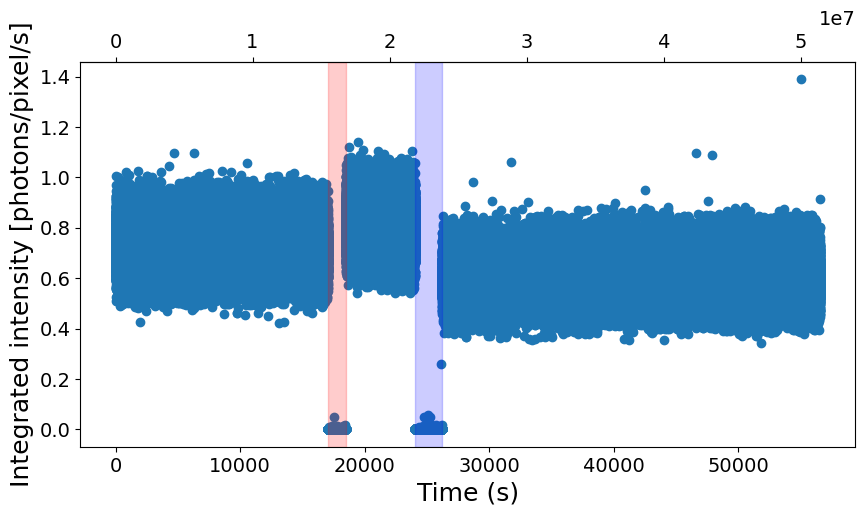

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))
plt.axvspan(t_It[Nf_down1//Nstep], t_It[Nf_up1//Nstep], color='red', alpha=0.2)
plt.axvspan(t_It[Nf_down2//Nstep], t_It[Nf_up2//Nstep], color='blue', alpha=0.2)
plt.show()

Cut the no-beam frams!

In [10]:
frame_mask = np.ones(e4m_data.shape[0], dtype=bool)
frame_mask[Nf_down1:Nf_up1] = False
frame_mask[Nf_down2:Nf_up2] = False
e4m_data = e4m_data[frame_mask, :]

Nf_downA = Nf_down1
Nf_downB = Nf_down2 - (Nf_up1 - Nf_down1)

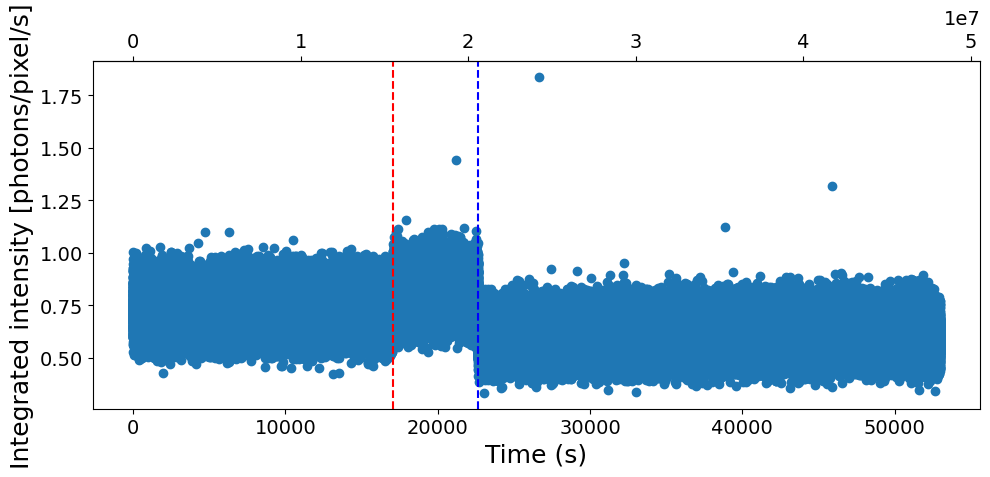

In [11]:
####################
Lbin = 1
Nstep = 100
mask = None
Nfi = None
Nff = None
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep, Nfi=Nfi, Nff=Nff)
np.savez(It_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq), t_It=t_It, It=It)

plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))
plt.axvline(t_It[Nf_downA//Nstep], color='red', linestyle='--', label='Nf_downA')
plt.axvline(t_It[Nf_downB//Nstep], color='blue', linestyle='--', label='Nf_downB')
plt.tight_layout(); plt.show()

### Flux check

################################################################################
Maximum count in the hull run -> 5.0
# of pixels above Ith_high treshold ->  4268374 pixels (of 4471016 => 95.47 %)
################################################################################



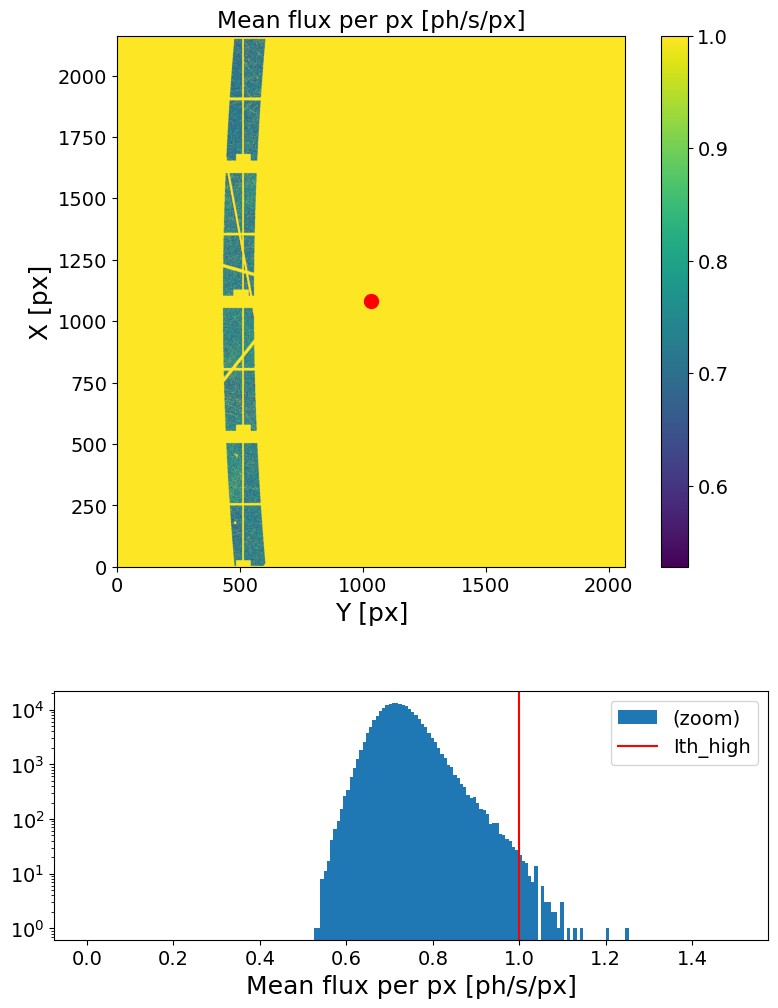

In [12]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=1, Nfi=None, Nff=int(1e7), load_mask=load_mask, mask=None)

### Linear correlation 4 tests

In [14]:
###################
Nfi = None#int(0e7)
Nff = None#int(None)
Lbin = 1000
bin2dense = True
mask = None
###################
if Lbin is None: Lbin=1

G2t = XPCS.get_G2t(e4m_data, mask=mask, Nfi=Nfi, Nff=Nff, Lbin=Lbin, bin2dense=bin2dense)

Loading frames ...
Done! (elapsed time = 0.0 s)
Binning frames (Lbin = 1000, using MKL library) ...


Done! (elapsed time = 61.43 s)
	 | 48154 frames X 202742 pixels
	 | memory usage (np.array @ float32) = 36.369 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 85.97 s)
	 | 48154 X 48154 squared matrix
	 | memory usage (np.array @ float32) = 8.638 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 2.76 s)



In [15]:
############################
t1, t2 = 0, 100
vmin, vmax = 1.0, 1.03
############################
#XPCS.plot_G2t(G2t, vmin, vmax, itime*Lbin, t1=t1, t2=t2, sigma_filter=None)

In [21]:
################
Nbunch = 20
################

NfXbunch = int(G2t.shape[0]/Nbunch)
t, g2, t_mt, g2_mt = {}, {}, {}, {}
for n in range(Nbunch):
    if Nfi is None: Nfi = 0
    t_bunch = Nfi*itime + round(itime*Lbin*NfXbunch*(n+1/2),1)

    if Nbunch!=1: t[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t[NfXbunch*n:NfXbunch*(n+1), NfXbunch*n:NfXbunch*(n+1)]), cython=True)
    else:         t[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t), cython=True)
    t_mt[t_bunch], g2_mt[t_bunch] = XPCS.get_g2mt_fromling2(itime*Lbin, g2[t_bunch])    


Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing 

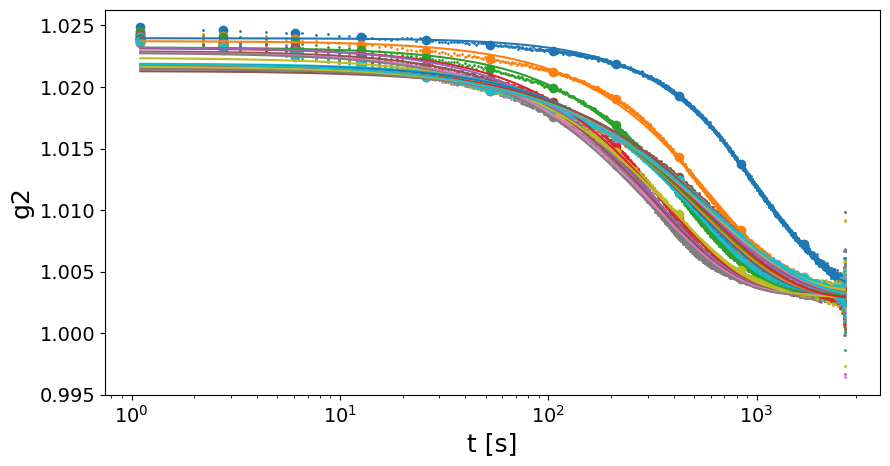

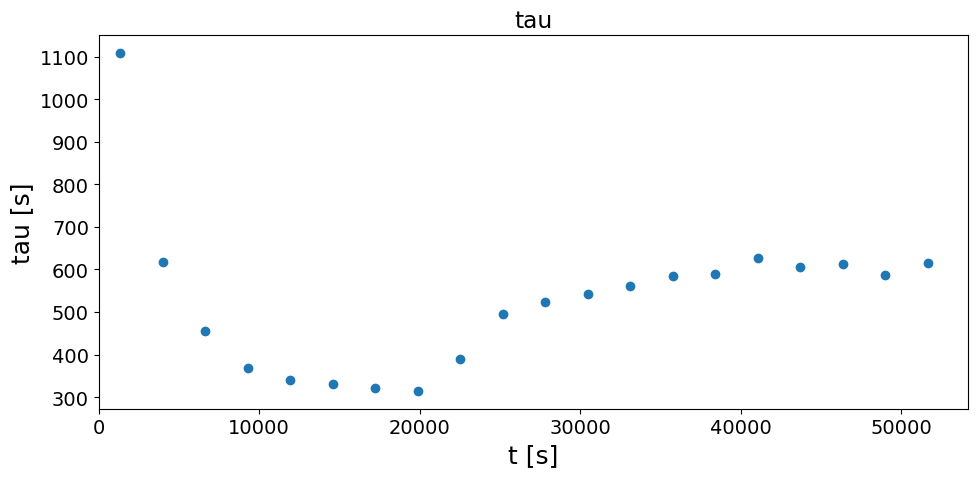

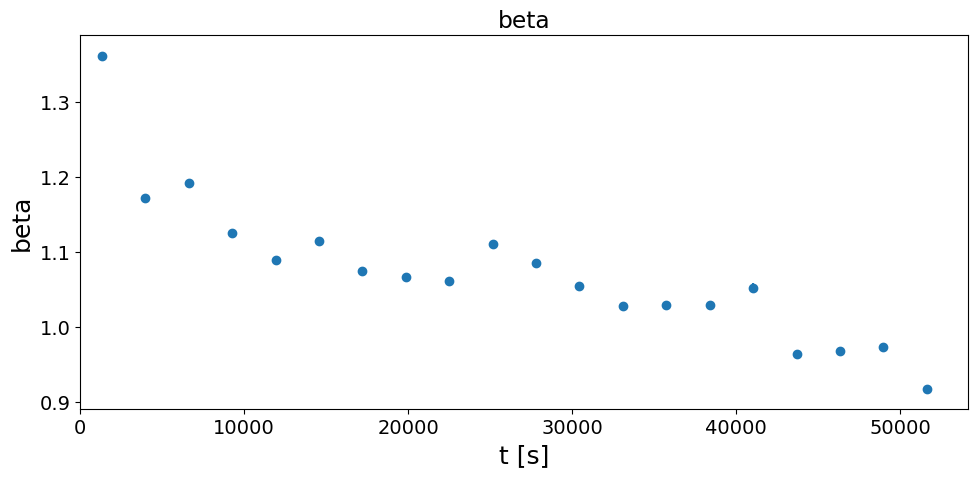

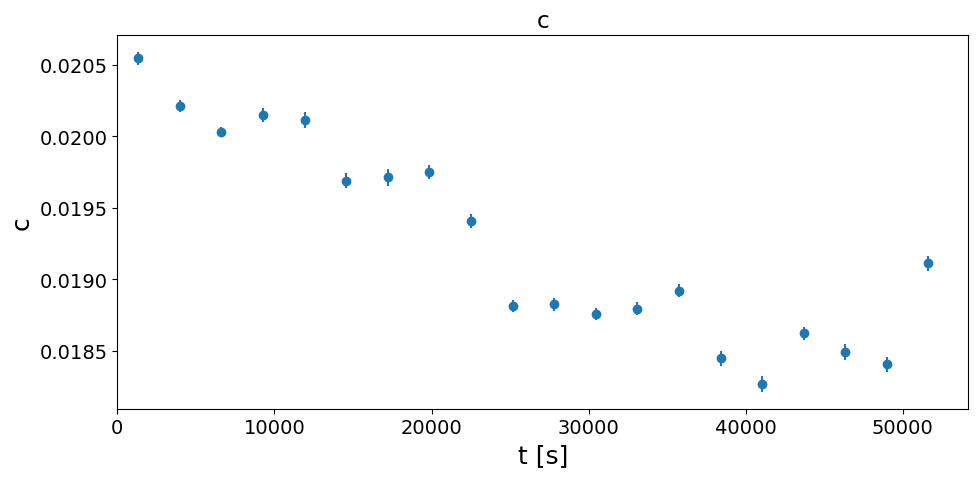

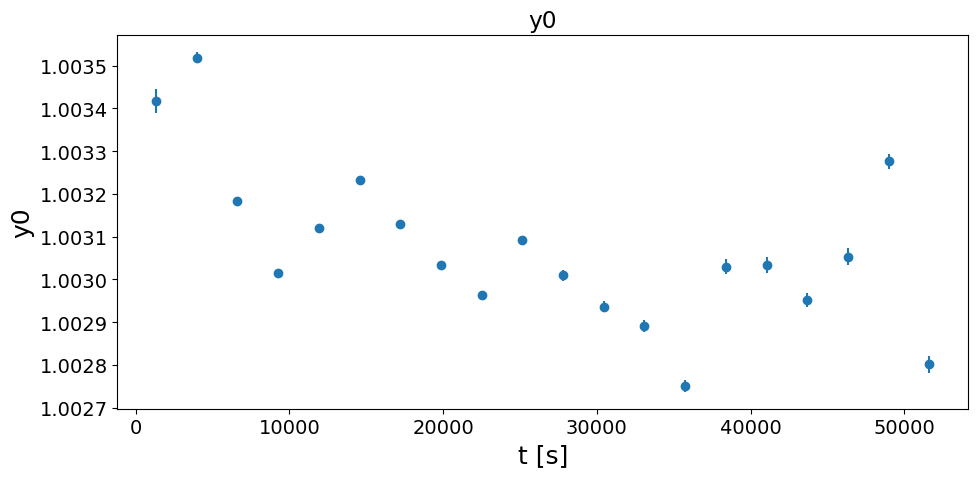

In [23]:
##################
t1_fit = 0
t2_fit = 1e10
##################

#####################################################
model = lm.Model(decorrelation_f)
params = lm.Parameters()
params.add('tau', value=1000, min=0, max=1e6)
params.add('beta', value=1, min=0, max=2)
params.add('c', value=.02, min=0, max=1)
params.add('y0', value=1, min=0, max=2)
#params.add('y0', value=1, vary=False)
#####################################################
 
plt.figure(figsize=(10,5))
g2_fit = pd.DataFrame(columns=['Q', 'dQ', 'tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
g2_fit.index.name = 't'
for i,k in enumerate(g2.keys()):
    plt.scatter(t[k], g2[k], s=1,  c='C'+str(i), label = str(k)+'s')
    plt.scatter(t_mt[k], g2_mt[k], c='C'+str(i), label=str(k)+'s')

    x = t[k] [(t1_fit<t[k])*(t[k]<t2_fit)]
    y = g2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
    fit = model.fit(y, params, t=x)
    g2_fit.loc[k] = [Q, dq, fit.params['tau'].value, fit.params['beta'].value, fit.params['c'].value, fit.params['y0'].value, fit.params['tau'].stderr, fit.params['beta'].stderr, fit.params['c'].stderr, fit.params['y0'].stderr]

    x = np.arange(np.min(t[k]), np.max(t[k]), 1e-2)
    y = decorrelation_f(x, *g2_fit.loc[k].values[2:6])
    plt.plot(x, y,)

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
#plt.ylim(1, 1.03)
#plt.legend()
plt.show()

if Nbunch == 1:
    display(fit.params)
else:
    plt.figure(figsize=(10,5))
    plt.title('tau')
    plt.errorbar(g2_fit.index, g2_fit.tau,  yerr=g2_fit.dtau, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('tau [s]')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('beta')
    plt.errorbar(g2_fit.index, g2_fit.beta,  yerr=g2_fit.dbeta, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('beta')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('c')
    plt.errorbar(g2_fit.index, g2_fit.c,  yerr=g2_fit.dc, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('c')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('y0')
    plt.errorbar(g2_fit.index, g2_fit.y0,  yerr=g2_fit.dy0, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('y0')
    plt.tight_layout(); plt.show()

### Linear by dose

In [178]:
t_downA = Nf_down1*itime
t_downB = Nf_down2*itime
t_ff = e4m_data.shape[0]*itime
print('#############################')
print('Nf_downA =', Nf_downA, ' =>  t_down1 =', t_downA)
print('Nf_downB =', Nf_downB, ' =>  t_down2 =', t_downB)
print('Nff =    =',e4m_data.shape[0], ' =>  t_ff =', t_ff)
print('#############################\n')

#############################
Nf_downA = 15492456  =>  t_down1 = 17041.7016
Nf_downB = 20579248  =>  t_down2 = 24065.1323
Nff =    = 48154460  =>  t_ff = 52969.906
#############################



In [186]:
t_segments = [
    (0, 2e3),
    (2e3, 4e3),
    (4e3, 6e3),
    (6e3, 8e3),
    (8e3, 10e3),
    (10e3, 12e3),
    (12e3, 14e3),
    (14e3, 16e3),
    (16e3, t_downA),
    (t_downA, 20e3),
    (20e3, 22e3),
    (22e3, t_downB),
    (t_downB, 26e3),
    (26e3, 28e3),
    (28e3, 30e3),
    (30e3, 32e3),
    (32e3, 34e3),
    (34e3, 36e3),
    (36e3, 38e3),
    (38e3, 40e3),
    (40e3, 42e3),
    (42e3, 44e3),
    (44e3, 46e3),
    (46e3, 48e3),
    (48e3, 50e3),
    (50e3, t_ff),
]

Nf_segments =  [(int(t_segments[i][0]//itime), int(t_segments[i][1]//itime)) for i in range(len(t_segments))]

In [187]:
###################
Lbin = 1000
bin2dense = True
mask = None
###################

t_g2, g2= {}, {}
for i in range(len(Nf_segments)):
    Nfi = Nf_segments[i][0]
    Nff = Nf_segments[i][1]
    G2t = XPCS.get_G2t(e4m_data, mask=mask, Nfi=Nfi, Nff=Nff, Lbin=Lbin, bin2dense=bin2dense)

    t_bunch = Nfi*itime + (Nff-Nfi)/2*itime
    t_g2[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t), cython=True)
np.savez(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq), t_g2=t_g2, g2=g2)
# np.load(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq)+'.npz', allow_pickle=True)

Loading frames ...
Done! (elapsed time = 0.7 s)
Binning frames (Lbin = 1000, using MKL library) ...
Done! (elapsed time = 0.84 s)
	 | 1818 frames X 210139 pixels
	 | memory usage (np.array @ float32) = 1.423 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 0.26 s)
	 | 1818 X 1818 squared matrix
	 | memory usage (np.array @ float32) = 0.012 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 0.07 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Loading frames ...
Done! (elapsed time = 0.69 s)
Binning frames (Lbin = 1000, using MKL library) ...
Done! (elapsed time = 0.83 s)
	 | 1818 frames X 210139 pixels
	 | memory usage (np.array @ float32) = 1.423 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 0.3 s)
	 | 1818 X 1818 squared matrix
	 | memory usage (np.array @ float32) = 0.012 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 0.07 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Load

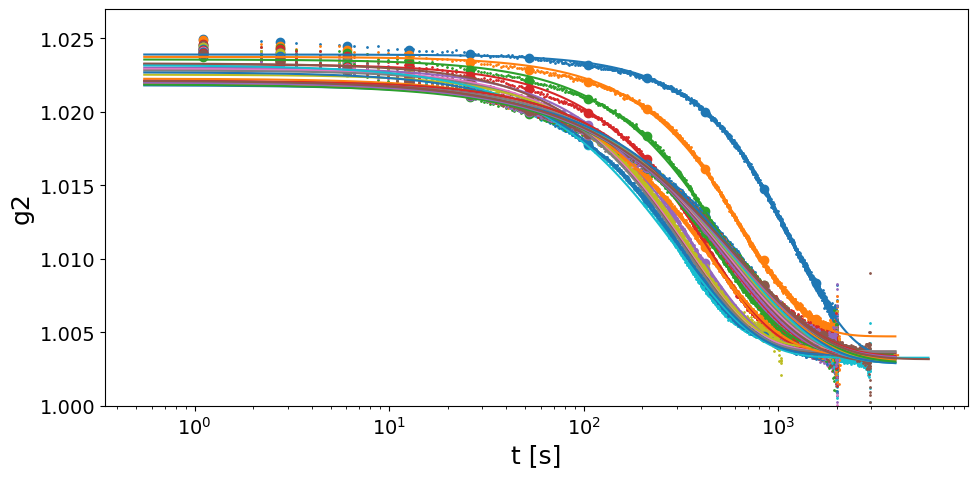

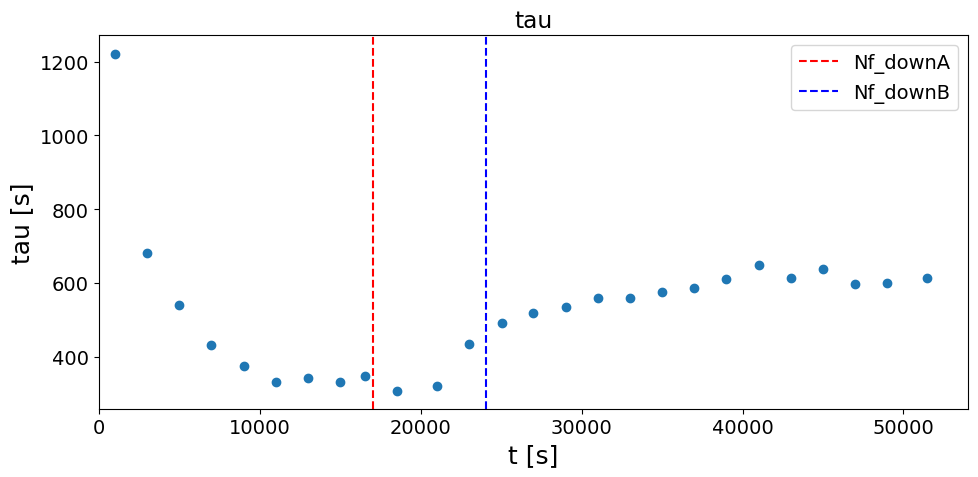

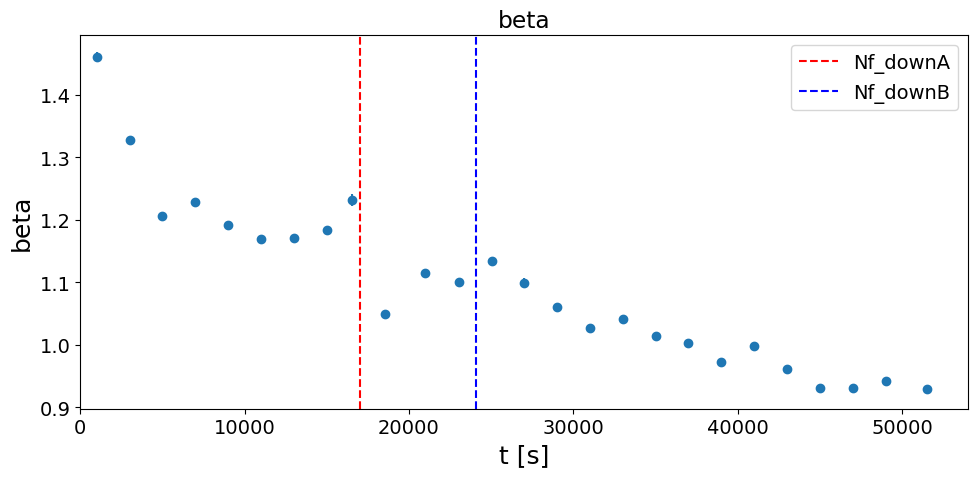

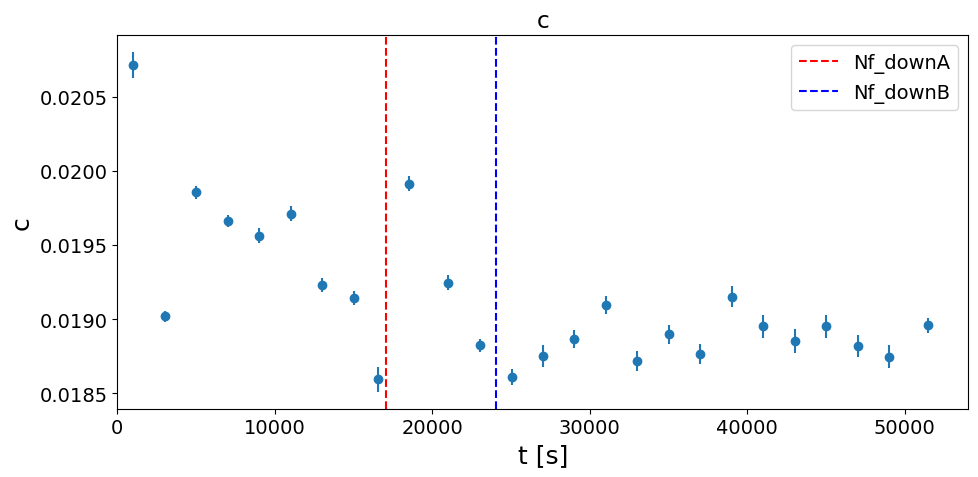

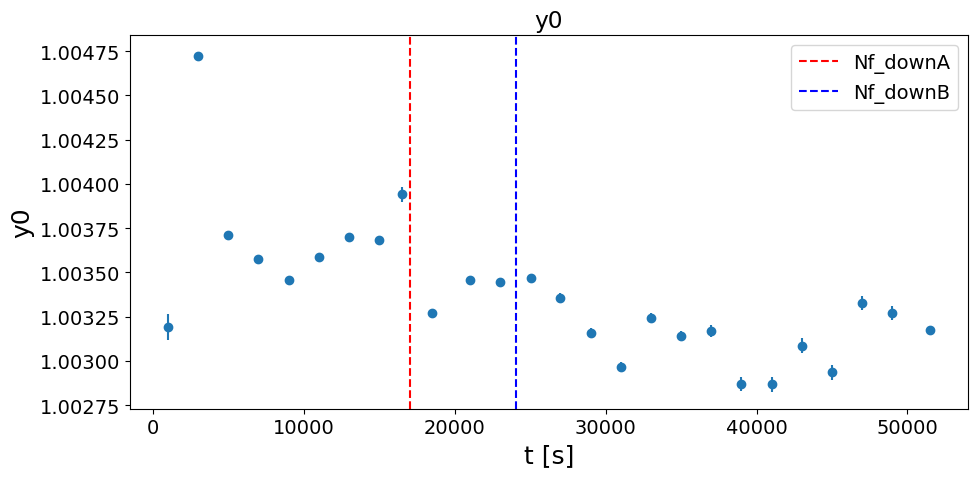

In [188]:
##################
t1_fit = 0
t2_fit = 1e10
##################

#####################################################
model = lm.Model(decorrelation_f)
params = lm.Parameters()
params.add('tau', value=1000, min=0, max=1e6)
params.add('beta', value=1, min=0, max=2)
params.add('c', value=.02, min=0, max=1)
params.add('y0', value=1, min=0, max=2)
#params.add('y0', value=1, vary=False)
#####################################################
 
plt.figure(figsize=(10,5))
g2_fit = pd.DataFrame(columns=['Q', 'dQ', 'tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
g2_fit.index.name = 't'
for i,k in enumerate(g2.keys()):
    plt.scatter(t_g2[k], g2[k], s=1,  c='C'+str(i), label = str(k)+'s')
    t_mt, g2_mt = XPCS.get_g2mt_fromling2(itime*Lbin, g2[k])
    plt.scatter(t_mt, g2_mt, c='C'+str(i), label=str(k)+'s')

    x = t_g2[k] [(t1_fit<t_g2[k])*(t_g2[k]<t2_fit)]
    y = g2[k][(t1_fit<t_g2[k])*(t_g2[k]<t2_fit)]
    fit = model.fit(y, params, t=x)
    g2_fit.loc[k] = [Q, dq, fit.params['tau'].value, fit.params['beta'].value, fit.params['c'].value, fit.params['y0'].value, fit.params['tau'].stderr, fit.params['beta'].stderr, fit.params['c'].stderr, fit.params['y0'].stderr]

    x = np.arange(np.min(t_g2[k])/2, np.max(t_g2[k])*2, 1e-2)
    y = decorrelation_f(x, *g2_fit.loc[k].values[2:6])
    plt.plot(x, y,)

g2_fit.to_csv(g2fit_folder+'g2fit_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq)+'.csv')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.ylim(1, 1.027)
#plt.legend()
plt.tight_layout(); plt.show()

if Nbunch == 1:
    display(fit.params)
else:
    plt.figure(figsize=(10,5))
    plt.title('tau')
    plt.errorbar(g2_fit.index, g2_fit.tau,  yerr=g2_fit.dtau, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('tau [s]')
    plt.axvline(t_downA, color='red', linestyle='--', label='Nf_downA')
    plt.axvline(t_downB, color='blue', linestyle='--', label='Nf_downB')
    plt.legend()
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('beta')
    plt.errorbar(g2_fit.index, g2_fit.beta,  yerr=g2_fit.dbeta, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('beta')
    plt.xlim(0)
    plt.axvline(t_downA, color='red', linestyle='--', label='Nf_downA')
    plt.axvline(t_downB, color='blue', linestyle='--', label='Nf_downB')
    plt.legend()
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('c')
    plt.errorbar(g2_fit.index, g2_fit.c,  yerr=g2_fit.dc, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('c')
    plt.xlim(0)
    plt.axvline(t_downA, color='red', linestyle='--', label='Nf_downA')
    plt.axvline(t_downB, color='blue', linestyle='--', label='Nf_downB')
    plt.legend()
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('y0')
    plt.errorbar(g2_fit.index, g2_fit.y0,  yerr=g2_fit.dy0, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('y0')
    plt.axvline(t_downA, color='red', linestyle='--', label='Nf_downA')
    plt.axvline(t_downB, color='blue', linestyle='--', label='Nf_downB')
    plt.legend()
    plt.tight_layout(); plt.show()

### Multi-tau Correlation (TO BE REORDER!!!)

In [13]:
XPCS.print_Nf_choices(len(scan['fast_timer_period']))

       Nf = 51405338    =>    log2(Nf) = 25.62
----------------------------------------------------
   reduced Nf  dense depth (2^x)  thrown frames %  thrown frames
0       2**25                 24             34.7       17850906
1     3*2**24                 23              2.0        1073690
2    49*2**20                 19              0.0          25114
3  3137*2**14                 13              0.0           8730
----------------------------------------------------


In [ ]:
##### INPUTS #####
Nfi = 0
Nff = 0 +3*2**24
sparse_depth = 13
dense_depth = 23
##################

G2tmt = XPCS.get_G2tmt_4sparse(e4m_data, sparse_depth, dense_depth, Nfi, Nff, mask=None)
#G2tmt = XPCS.get_G2tmt_4sparse_bypartialloading(RAW_folder, sample_name, Ndataset, Nscan, sparse_depth, dense_depth, Nfi, Nff, mask = load_mask, n_jobs=1)
t_mt, g2_mt, dg2_mt = XPCS.get_g2mt(itime, G2tmt)

In [ ]:
############################
vmin, vmax = 1.005, 1.025
lower_mt = 8
filter_layer = 12
############################

XPCS.plot_G2tmt(G2tmt, itime, vmin, vmax, yscale='log', lower_mt=lower_mt, filter_layer=filter_layer)

In [ ]:
cut1 = XPCS.cut_G2tmt(itime, G2tmt, tmin=None, tmax=3000)
cut2 = XPCS.cut_G2tmt(itime, G2tmt, tmin=3000, tmax=6000)
cut3 = XPCS.cut_G2tmt(itime, G2tmt, tmin=6000, tmax=15000)
t_mt_1, g2_mt_1, dg2_mt_1 = XPCS.get_g2mt(itime, cut1)
t_mt_2, g2_mt_2, dg2_mt_2 = XPCS.get_g2mt(itime, cut2)
t_mt_3, g2_mt_3, dg2_mt_3 = XPCS.get_g2mt(itime, cut3)

In [ ]:
##################
t1_fit = 1
t2_fit = 1e8
##################

plt.figure(figsize=(10,5))
plt.errorbar(t_mt, g2_mt, yerr=dg2_mt, fmt='o', label='g2')
#plt.errorbar(t_mt_1, g2_mt_1, yerr=dg2_mt_1, fmt='o', label='CUT1')
#plt.errorbar(t_mt_2, g2_mt_2, yerr=dg2_mt_2, fmt='o', label='CUT2')
#plt.errorbar(t_mt_3, g2_mt_3, yerr=dg2_mt_3, fmt='o', label='CUT3')


popt, pcov = curve_fit(decorrelation_f, t_mt[(t1_fit<t_mt)*(t_mt<t2_fit)], g2_mt[(t1_fit<t_mt)*(t_mt<t2_fit)], p0=[1000, .8, .04, 1], bounds=([0, 0, 0, .9999], [np.inf, np.inf, np.inf, 1.1]))
x = np.arange(np.min(t_mt), np.max(t_mt)+1e5, 1e-2)
y = decorrelation_f(x, *popt)
plt.plot(x, y,)

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.legend()
plt.show()


print(f'tau = {popt[0]} +/- {np.sqrt(pcov[0,0])}')
print(f'beta = {popt[1]} +/- {np.sqrt(pcov[1,1])}')
print(f'c = {popt[2]} +/- {np.sqrt(pcov[2,2])}')
print(f'y0 = {popt[3]} +/- {np.sqrt(pcov[3,3])}')


## XPCS scan: delcoup=10, T=24h (Ta2O5_2.5um, 3, 9)  
Tantala annealed, substarte towards the beam

#############################
command = mtimescan 0.001 2 86000367
Ei = 21.669991317784486
itime = 0.0011
T =  6.521323416666667 h
theta = 10.0
Qc = 1.91
#############################



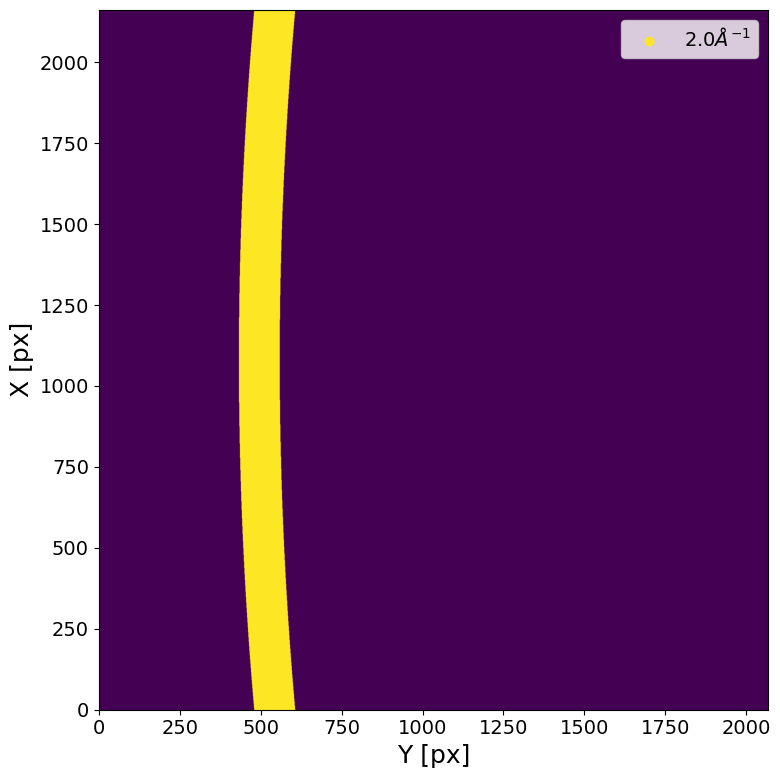

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/4269 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/4269 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00050.h5 (51/4269 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/4269 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/4269 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00051.h5 (52/4269 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00052.h5 (53/4269 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00053.h5 (54/4269 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/4269 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/4269 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00054.h5 (55/4269 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/4269 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00055.h5 (56/4269 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00056.h5 (57/4269 loops)
	 -> loading fil

Exception ignored in: <function ResourceTracker.__del__ at 0x75ae7dc5fce0>
Traceback (most recent call last):
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x75a8c2a97ce0>
Traceback (most recent call last):
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", li

In [ ]:
#######################################
sample_name = 'Ta2O5_2.5um'
Ndataset = 3
Nscan = 9
#######################################

scan = ID10.load_scan(RAW_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
T = scan['fast_timer_period'].size*itime
theta = scan['delcoup']
Qc = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('T = ', T/60**2, 'h')
print('theta =', theta)
print('Qc =', Qc)
print('#############################\n')

#################################################################################
Nfi, Nff = None, None
Qmask = XPCS.gen_Qmask(Ei, theta, Q, dq, Qmap_plot=False)
load_mask = e4m_mask*e4m_htmask*Qmask
##################################################################################

e4m_data = ID10.load_sparse_e4m(RAW_folder, sample_name, Ndataset, Nscan, Nfi=Nfi, Nff=Nff, load_mask=load_mask, n_jobs=50, )

### Flux check

################################################################################
Maximum count in the hull run -> 5.0
# of pixels above Ith_high treshold ->  4260883 pixels (of 4471016 => 95.3 %)
################################################################################



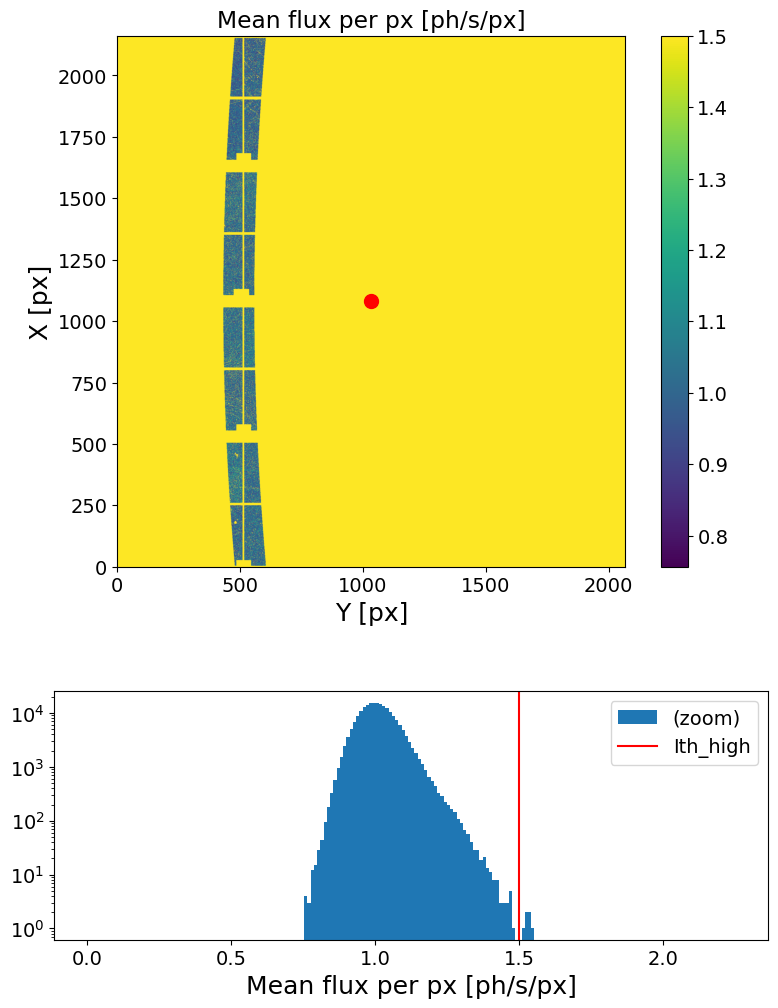

In [ ]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=1.5, Nfi=None, Nff=int(1e7), load_mask=load_mask, mask=None)

### Intensity analysis

In [ ]:
####################
Lbin = 1
Nstep = 100
mask = None
Nfi = None
Nff = None
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep, Nfi=Nfi, Nff=Nff)
np.savez(It_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq), t_It=t_It, It=It)

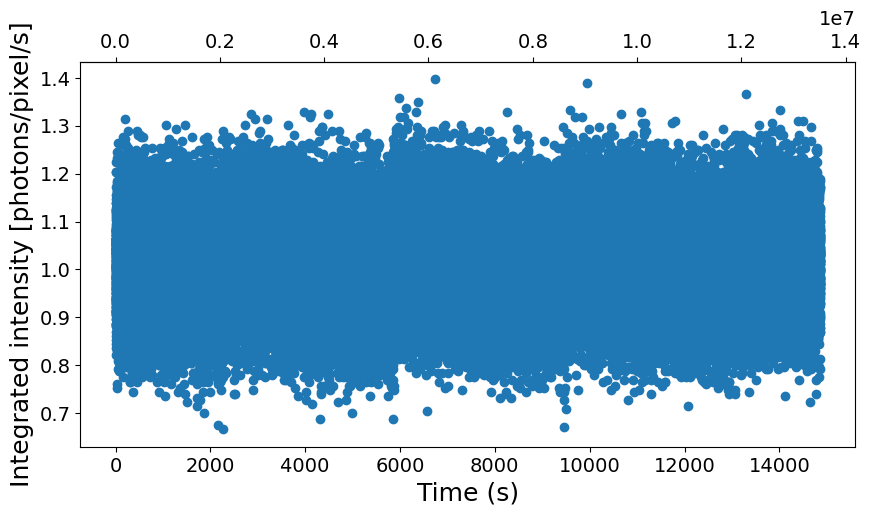

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))
plt.show()

### Pilatus

In [ ]:
#######################################
Nfi, Nff =  0, None
Nstep = 100
#######################################

pilatus_data = ID10.load_pilatus(RAW_folder, sample_name, Ndataset, Nscan, Nfi=Nfi, Nff=Nff, Nstep=Nstep)

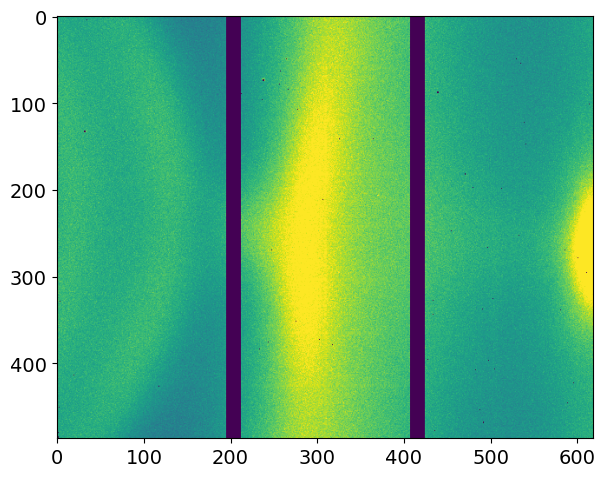

In [41]:
#################
Nf_pilatus = 0
#################

plt.figure(figsize=(10, 5))
plt.imshow(pilatus_data[Nf_pilatus].T, vmin=0, vmax=500)
plt.tight_layout(); plt.show()

Computing azimuthal integration...


100%|██████████| 118/118 [00:00<00:00, 151.83it/s]


Done! (elapsed time = 0.78 s)


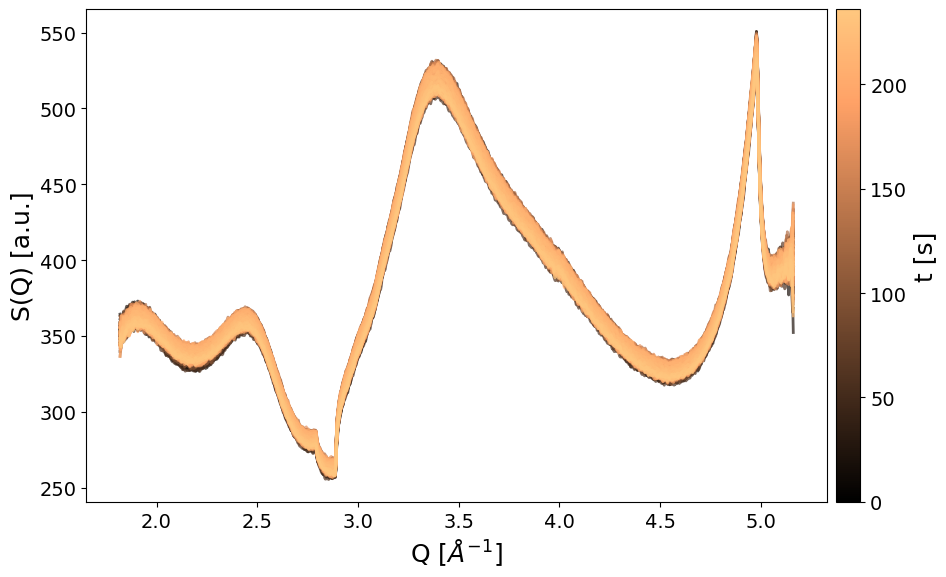

In [ ]:
q, Sq, dSq = XPCS.get_Sq(pilatus_data, ponifile=pilatus_LaB6_poni, mask=pilatus_mask)

XPCS.plot_Sq(q, Sq, itime=2, )

### Linear correlation 4 tests

In [ ]:
###################
Nfi = int(0e7)
Nff = int(.5e7)
Lbin = 1000
mask = None
###################
if Lbin is None: Lbin=1

G2t = XPCS.get_G2t(e4m_data, mask=mask, Nfi=Nfi, Nff=Nff, Lbin=Lbin, bin2dense=True)

Loading frames ...
Done! (elapsed time = 6.28 s)
Binning frames (Lbin = 1000, using MKL library) ...
Done! (elapsed time = 1.46 s)
	 | 5000 frames X 210139 pixels
	 | memory usage (np.array @ float32) = 3.914 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 2.08 s)
	 | 5000 X 5000 squared matrix
	 | memory usage (np.array @ float32) = 0.093 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 0.53 s)



In [ ]:
############################
t1, t2 = 0, 100
vmin, vmax = 1.0, 1.03
############################
#XPCS.plot_G2t(G2t, vmin, vmax, itime*Lbin, t1=t1, t2=t2, sigma_filter=None)

In [ ]:
################
Nbunch = 3
################

NfXbunch = int(G2t.shape[0]/Nbunch)
t, g2, t_mt, g2_mt = {}, {}, {}, {}
for n in range(Nbunch):
    
    t_bunch = Nfi*itime + round(itime*Lbin*NfXbunch*(n+1/2),1)

    if Nbunch!=1: t[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t[NfXbunch*n:NfXbunch*(n+1), NfXbunch*n:NfXbunch*(n+1)]), cython=True)
    else:         t[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t), cython=True)
    t_mt[t_bunch], g2_mt[t_bunch] = XPCS.get_g2mt_fromling2(itime*Lbin, g2[t_bunch])    


Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.0 s)



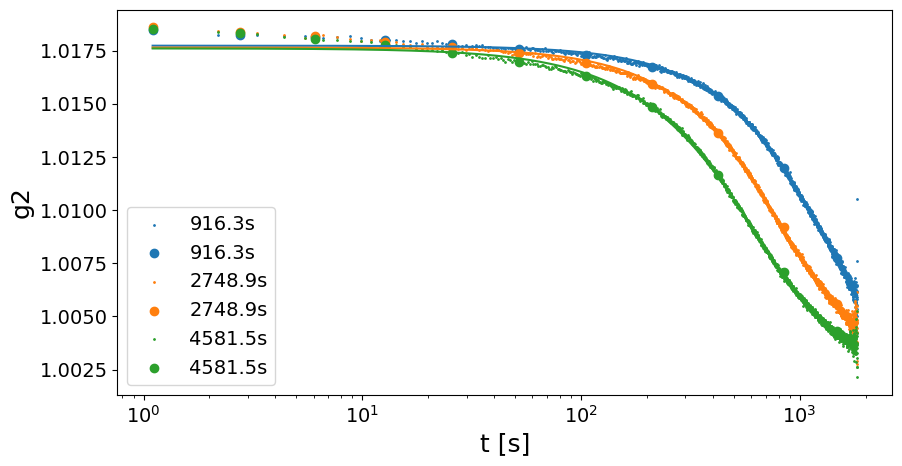

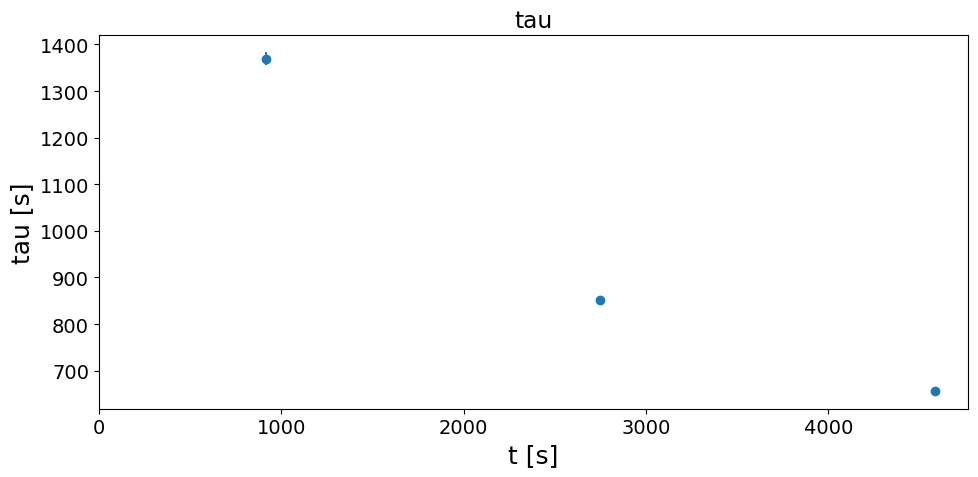

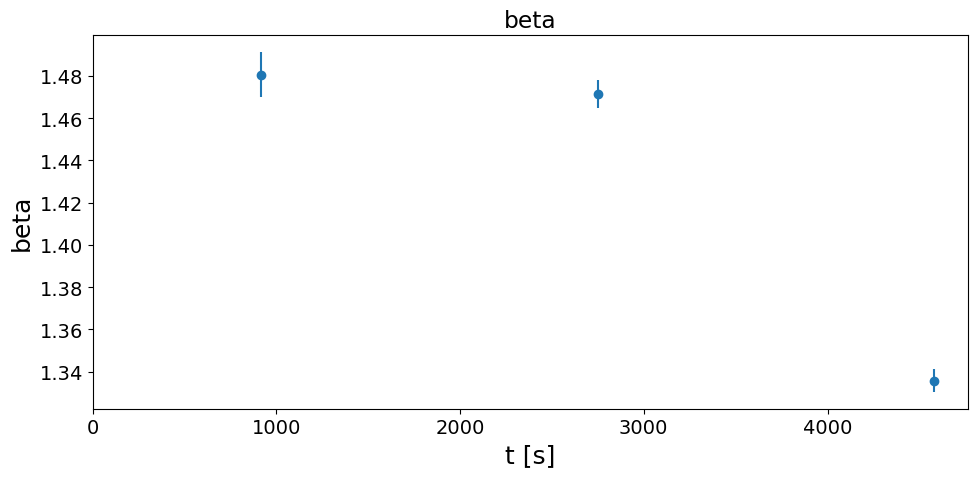

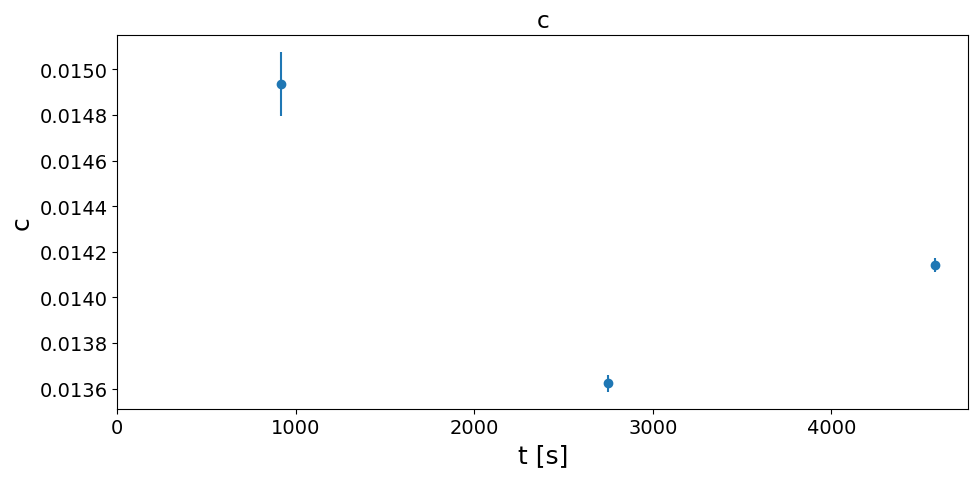

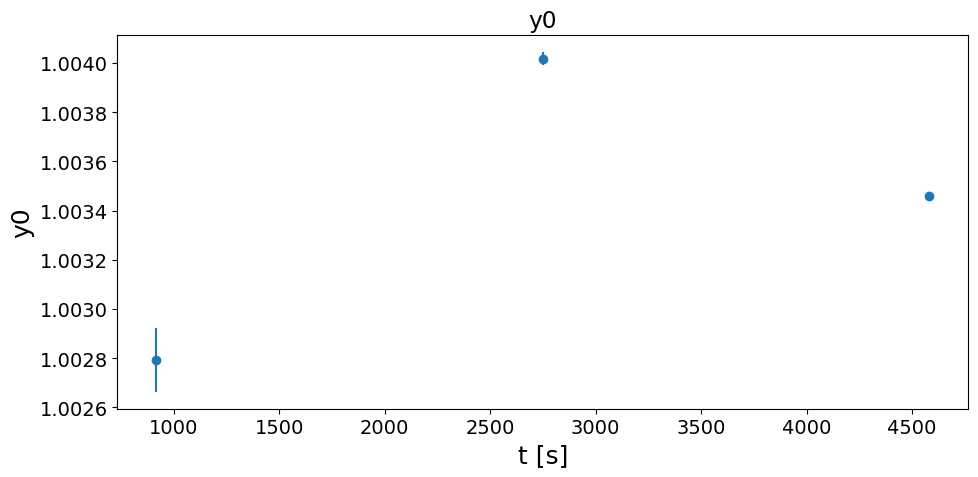

In [ ]:
##################
t1_fit = 0
t2_fit = 1e10
##################

#####################################################
model = lm.Model(decorrelation_f)
params = lm.Parameters()
params.add('tau', value=1000, min=0, max=1e6)
params.add('beta', value=1, min=0, max=2)
params.add('c', value=.02, min=0, max=1)
params.add('y0', value=1, min=0, max=2)
#params.add('y0', value=1, vary=False)
#####################################################
 
plt.figure(figsize=(10,5))
g2_fit = pd.DataFrame(columns=['Q', 'dQ', 'tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
g2_fit.index.name = 't'
for i,k in enumerate(g2.keys()):
    plt.scatter(t[k], g2[k], s=1,  c='C'+str(i), label = str(k)+'s')
    plt.scatter(t_mt[k], g2_mt[k], c='C'+str(i), label=str(k)+'s')

    #x = t[k] [(t1_fit<t[k])*(t[k]<t2_fit)]
    #y = g2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
    x = t_mt[k] [(t1_fit<t_mt[k])*(t_mt[k]<t2_fit)]
    y = g2_mt[k][(t1_fit<t_mt[k])*(t_mt[k]<t2_fit)]
    
    fit = model.fit(y, params, t=x)
    g2_fit.loc[k] = [Q, dq, fit.params['tau'].value, fit.params['beta'].value, fit.params['c'].value, fit.params['y0'].value, fit.params['tau'].stderr, fit.params['beta'].stderr, fit.params['c'].stderr, fit.params['y0'].stderr]

    x = np.arange(np.min(t[k]), np.max(t[k]), 1e-2)
    y = decorrelation_f(x, *g2_fit.loc[k].values[2:6])
    plt.plot(x, y,)

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
#plt.ylim(1, 1.03)
plt.legend()
plt.show()

if Nbunch == 1:
    display(fit.params)
else:
    plt.figure(figsize=(10,5))
    plt.title('tau')
    plt.errorbar(g2_fit.index, g2_fit.tau,  yerr=g2_fit.dtau, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('tau [s]')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('beta')
    plt.errorbar(g2_fit.index, g2_fit.beta,  yerr=g2_fit.dbeta, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('beta')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('c')
    plt.errorbar(g2_fit.index, g2_fit.c,  yerr=g2_fit.dc, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('c')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('y0')
    plt.errorbar(g2_fit.index, g2_fit.y0,  yerr=g2_fit.dy0, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('y0')
    plt.tight_layout(); plt.show()

### Linear by dose

In [ ]:
t_ff = e4m_data.shape[0]*itime
print('#############################')
print('Nff =    =',e4m_data.shape[0], ' =>  t_ff =', t_ff)
print('#############################\n')

#############################
Nff =    = 13506635  =>  t_ff = 14857.2985
#############################



In [ ]:
t_segments = [
    (0, 1.5e3),
    (1.5e3, 3e3),
    (3e3, 4.5e3),
    (4.5e3, 6e3),
    (6e3, 7.5e3),
    (7.5e3, 9e3),
    (9e3, 10.5e3),
    (10.5e3, 12e3),
    (12e3, 13.5e3),
]

Nf_segments =  [(int(t_segments[i][0]//itime), int(t_segments[i][1]//itime)) for i in range(len(t_segments))]

In [ ]:
###################
Lbin = 100
bin2dense = False
mask = None
###################

t_g2, g2= {}, {}
for i in range(len(Nf_segments)):
    Nfi = Nf_segments[i][0]
    Nff = Nf_segments[i][1]
    G2t = XPCS.get_G2t(e4m_data, mask=mask, Nfi=Nfi, Nff=Nff, Lbin=Lbin, bin2dense=bin2dense)

    t_bunch = Nfi*itime + (Nff-Nfi)/2*itime
    t_g2[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t), cython=True)
np.savez(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq), t_g2=t_g2, g2=g2)

Loading frames ...
Done! (elapsed time = 1.66 s)
Binning frames (Lbin = 100, using MKL library) ...
Done! (elapsed time = 2.34 s)
	 | 13636 frames X 210139 pixels
	 | sparsity = 1.04e-01
	 | memory usage (sparse.csr_array @ float32) = 2.217 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 8.5 s)
	 | 13636 X 13636 squared matrix
	 | memory usage (np.array @ float32) = 0.693 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 0.07 s)

Computing g2 (using cython code)...
Done! (elapsed time = 0.07 s)

Loading frames ...
Done! (elapsed time = 0.71 s)
Binning frames (Lbin = 100, using MKL library) ...
Done! (elapsed time = 1.02 s)
	 | 13636 frames X 210139 pixels
	 | sparsity = 1.04e-01
	 | memory usage (sparse.csr_array @ float32) = 2.223 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 8.47 s)
	 | 13636 X 13636 squared matrix
	 | memory usage (np.array @ float32) = 0.693 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 0.09 s)



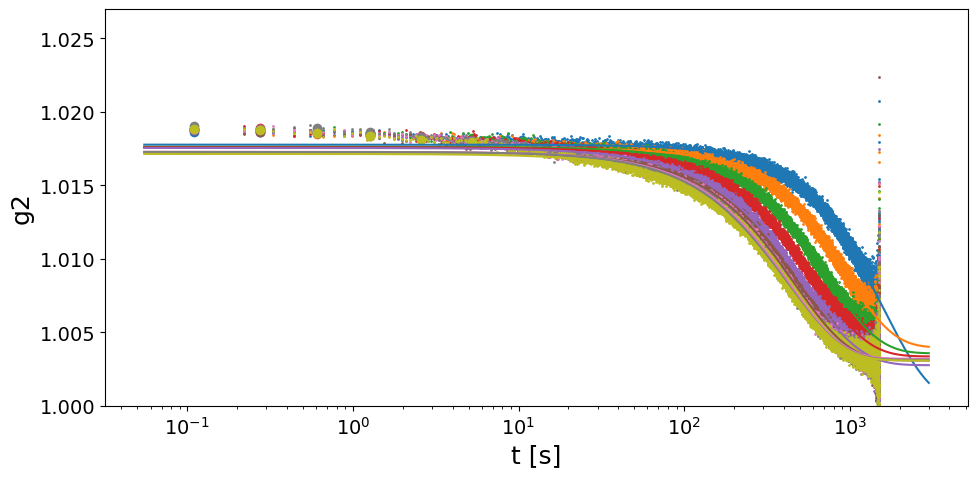

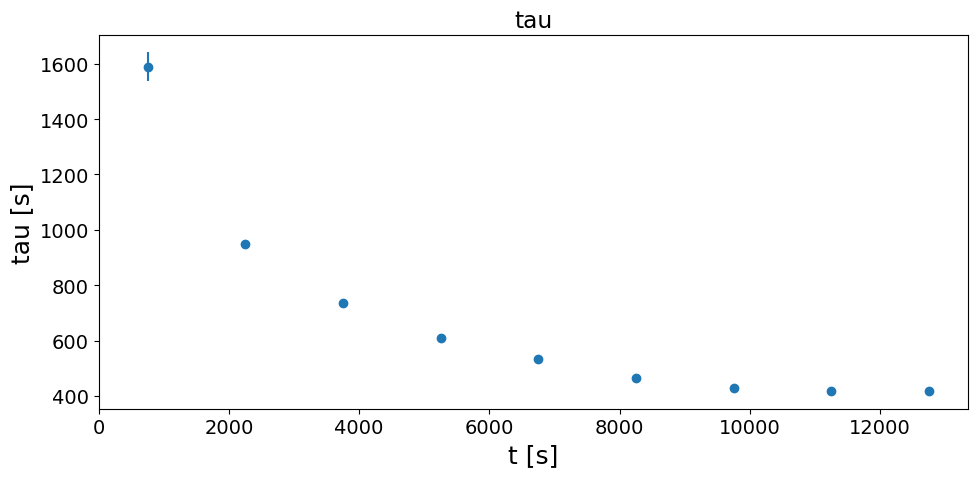

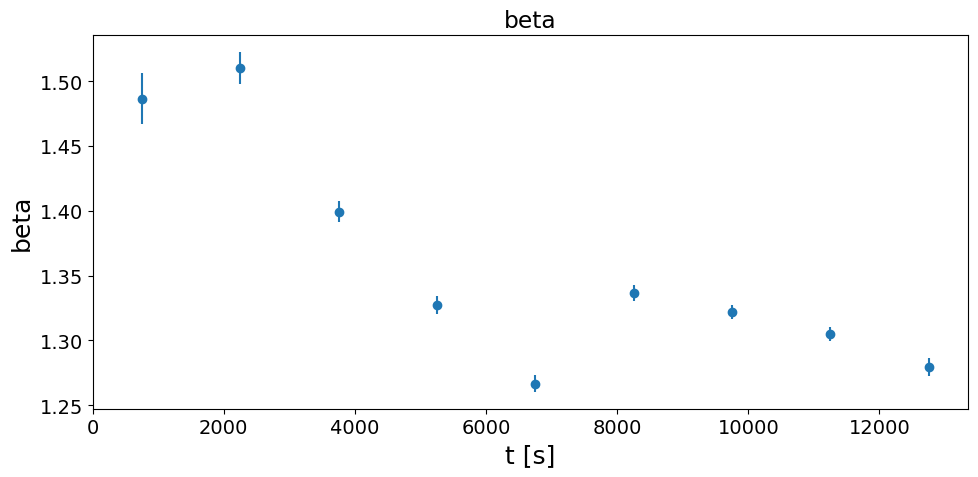

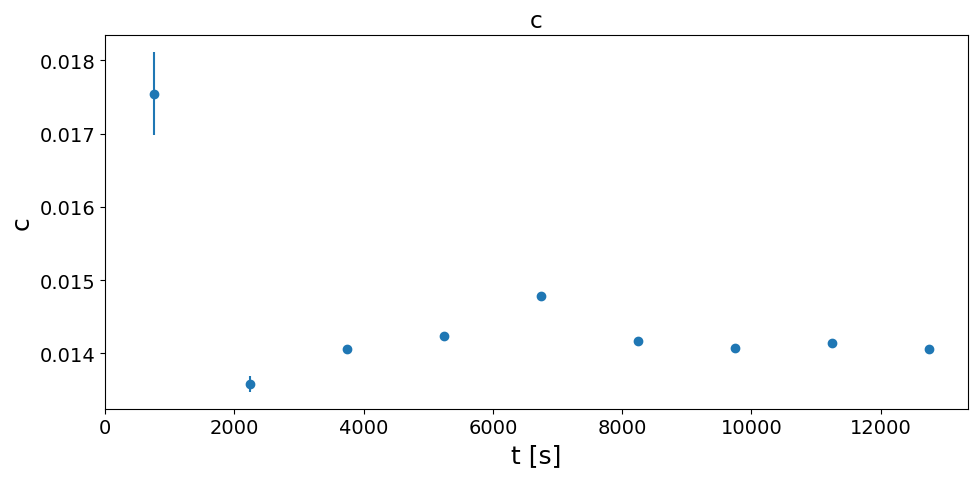

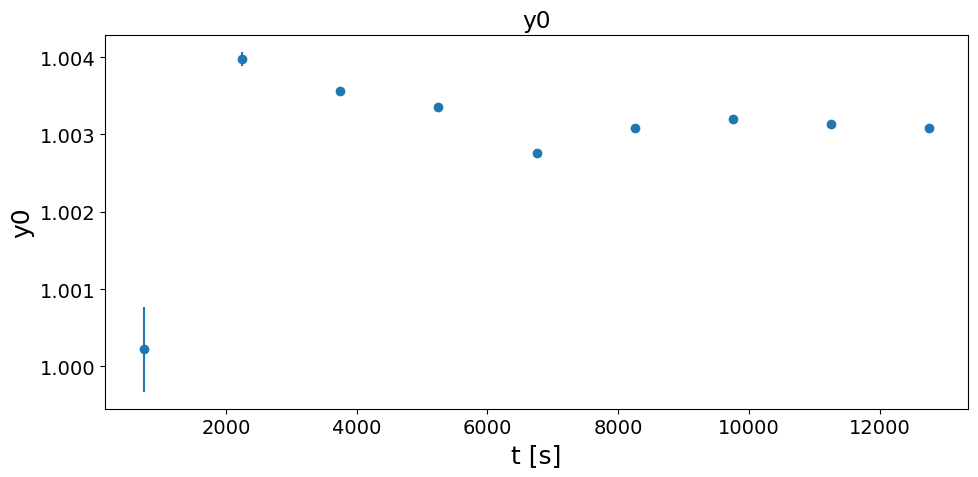

In [ ]:
##################
t1_fit = 0
t2_fit = 1e10
##################

#####################################################
model = lm.Model(decorrelation_f)
params = lm.Parameters()
params.add('tau', value=1000, min=0, max=1e6)
params.add('beta', value=1, min=0, max=2)
params.add('c', value=.02, min=0, max=1)
params.add('y0', value=1, min=0, max=2)
#params.add('y0', value=1, vary=False)
#####################################################
 
plt.figure(figsize=(10,5))
g2_fit = pd.DataFrame(columns=['Q', 'dQ', 'tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
g2_fit.index.name = 't'
for i,k in enumerate(g2.keys()):
    plt.scatter(t_g2[k], g2[k], s=1,  c='C'+str(i), label = str(k)+'s')
    t_mt, g2_mt = XPCS.get_g2mt_fromling2(itime*Lbin, g2[k])
    plt.scatter(t_mt, g2_mt, c='C'+str(i), label=str(k)+'s')

    x = t_g2[k] [(t1_fit<t_g2[k])*(t_g2[k]<t2_fit)]
    y = g2[k][(t1_fit<t_g2[k])*(t_g2[k]<t2_fit)]
    fit = model.fit(y, params, t=x)
    g2_fit.loc[k] = [Q, dq, fit.params['tau'].value, fit.params['beta'].value, fit.params['c'].value, fit.params['y0'].value, fit.params['tau'].stderr, fit.params['beta'].stderr, fit.params['c'].stderr, fit.params['y0'].stderr]

    x = np.arange(np.min(t_g2[k])/2, np.max(t_g2[k])*2, 1e-2)
    y = decorrelation_f(x, *g2_fit.loc[k].values[2:6])
    plt.plot(x, y,)

g2_fit.to_csv(g2fit_folder+'g2fit_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq)+'.csv')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.ylim(1, 1.027)
#plt.legend()
plt.tight_layout(); plt.show()

if Nbunch == 1:
    display(fit.params)
else:
    plt.figure(figsize=(10,5))
    plt.title('tau')
    plt.errorbar(g2_fit.index, g2_fit.tau,  yerr=g2_fit.dtau, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('tau [s]')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('beta')
    plt.errorbar(g2_fit.index, g2_fit.beta,  yerr=g2_fit.dbeta, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('beta')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('c')
    plt.errorbar(g2_fit.index, g2_fit.c,  yerr=g2_fit.dc, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('c')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('y0')
    plt.errorbar(g2_fit.index, g2_fit.y0,  yerr=g2_fit.dy0, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('y0')
    plt.tight_layout(); plt.show()

## XPCS scan: delcoup=10, T=24h (Ta2O5_2.5um_asdep, 1, 6)  

Tantala as deposited

#############################
command = mtimescan 0.001 2 86000367
Ei = 21.669991317784486
itime = 0.0011
T =  15.822294583333335 h
theta = 10.384625
Qc = 1.99
#############################



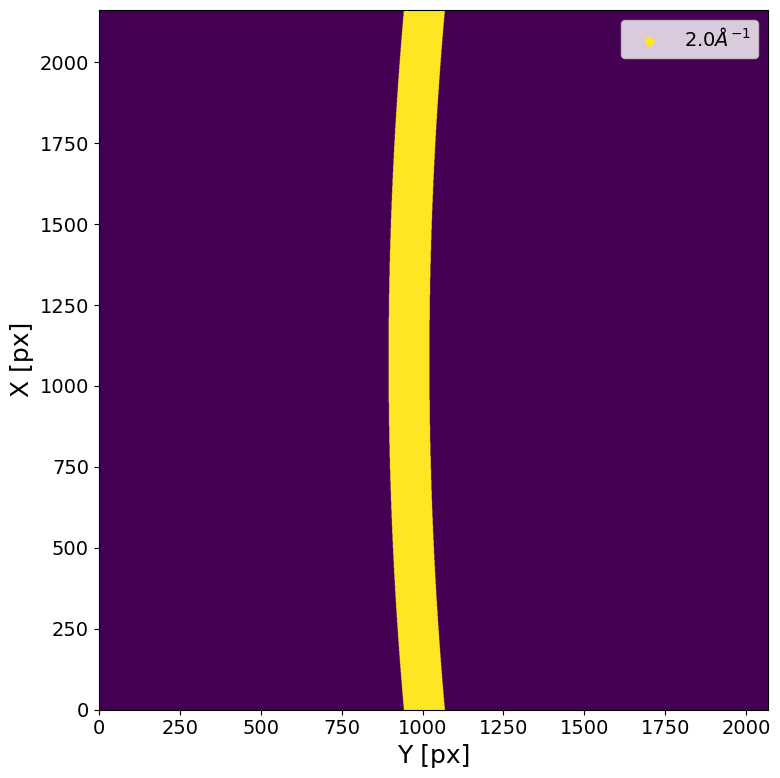

Loading sparse array ...


In [ ]:
#######################################
sample_name = 'Ta2O5_2.5um_asdep'
Ndataset = 1
Nscan = 6
#######################################

scan = ID10.load_scan(RAW_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
T = scan['fast_timer_period'].size*itime
theta = scan['delcoup']
Qc = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('T = ', T/60**2, 'h')
print('theta =', theta)
print('Qc =', Qc)
print('#############################\n')

#################################################################################
Nfi, Nff = None, None
Qmask = XPCS.gen_Qmask(Ei, theta, Q, dq, Qmap_plot=False)
load_mask = e4m_mask*e4m_htmask*Qmask
##################################################################################

e4m_data = ID10.load_sparse_e4m(RAW_folder, sample_name, Ndataset, Nscan, Nfi=Nfi, Nff=Nff, load_mask=load_mask, n_jobs=50, )

### Flux check

################################################################################
Maximum count in the hull run -> 5.0
# of pixels above Ith_high treshold ->  4260880 pixels (of 4471016 => 95.3 %)
################################################################################



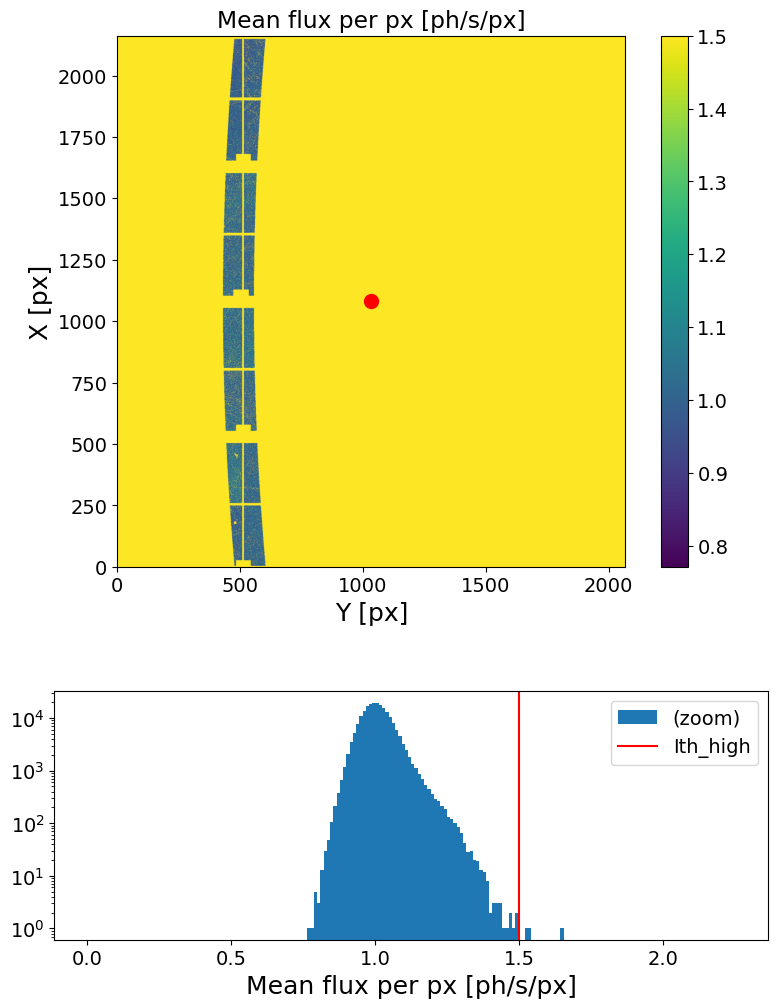

In [14]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=1.5, Nfi=None, Nff=int(1e7), load_mask=load_mask, mask=None)

### Intensity analysis

In [15]:
####################
Lbin = 100
Nstep = 10000
mask = None
Nfi = None
Nff = None
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep, Nfi=Nfi, Nff=Nff)
np.savez(It_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq), t_It=t_It, It=It)

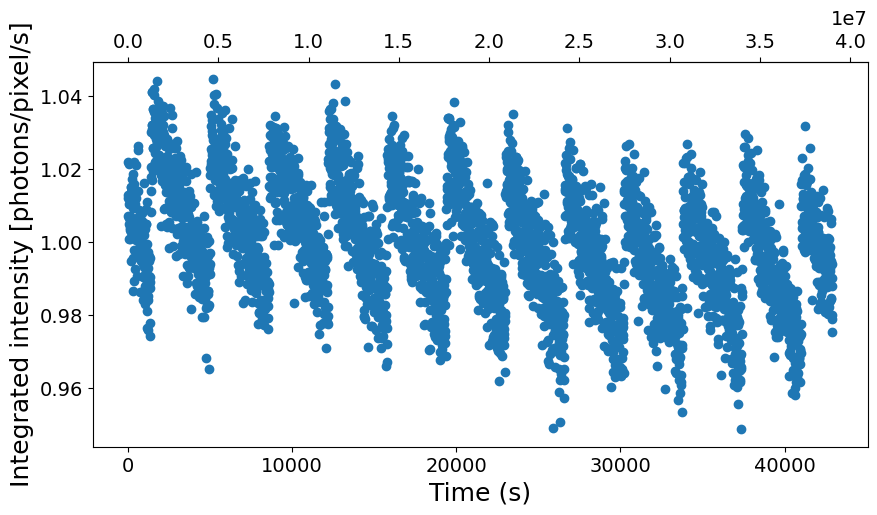

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))
#plt.xscale('log')
plt.show()

### Pilatus

In [82]:
#######################################
Nfi, Nff =  0, 5000
Nstep = 50
#######################################

pilatus_data = ID10.load_pilatus(RAW_folder, sample_name, Ndataset, Nscan, Nfi=Nfi, Nff=Nff, Nstep=Nstep)

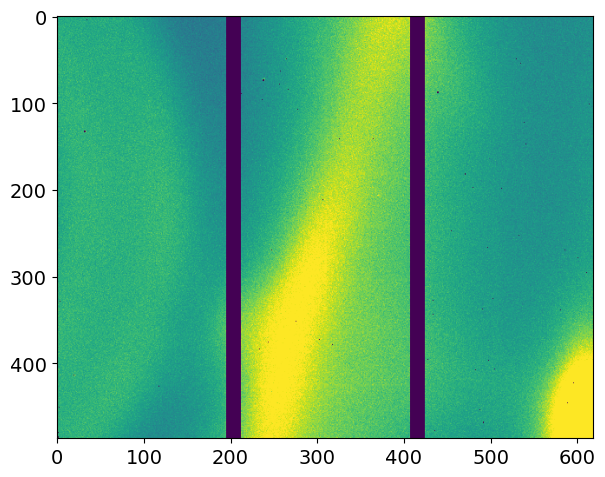

In [83]:
#################
Nf_pilatus = 0
#################

plt.figure(figsize=(10, 5))
plt.imshow(pilatus_data[Nf_pilatus].T, vmin=0, vmax=500)
plt.tight_layout(); plt.show()

Computing azimuthal integration...


 69%|██████▉   | 69/100 [00:00<00:00, 179.02it/s]

100%|██████████| 100/100 [00:00<00:00, 175.21it/s]


Done! (elapsed time = 0.57 s)


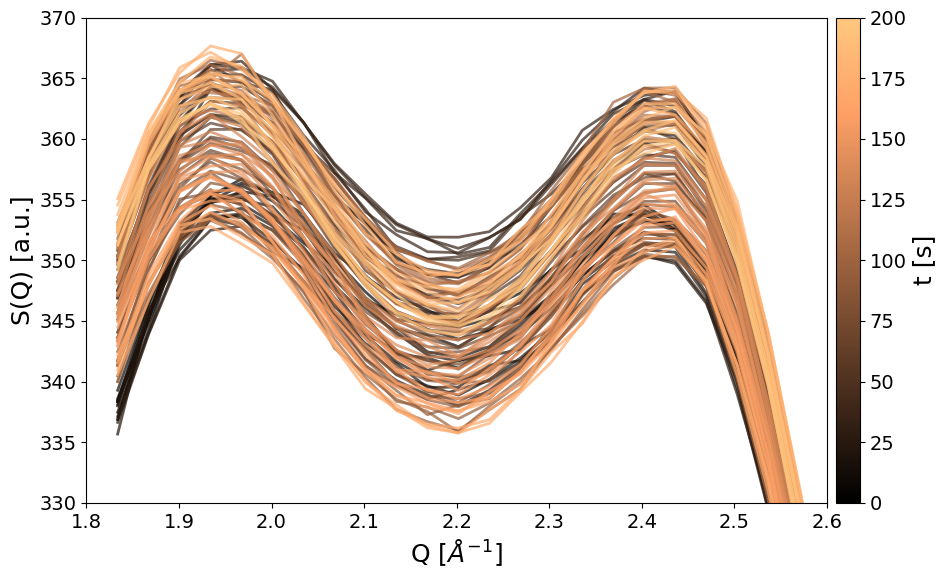

In [84]:
q, Sq, dSq = XPCS.get_Sq(pilatus_data, ponifile=pilatus_LaB6_poni, mask=pilatus_mask, npt=100)
XPCS.plot_Sq(q, Sq, itime=2, xlims=(1.8, 2.6), ylims=(330, 370))

### Linear correlation 4 tests

In [101]:
###################
Nfi = None
Nff = int(1e6)
Lbin = None
bin2dense = False
mask = None
###################
if Lbin is None: Lbin=1

#G2t = XPCS.get_G2t(e4m_data, mask=mask, Nfi=Nfi, Nff=Nff, Lbin=Lbin, bin2dense=bin2dense)
G2t = XPCS.get_G2t_bybunch(e4m_data, mask=mask, Nfi=Nfi, Nff=Nff, Lbin=Lbin, Nbunch=10)

Computing G2t for bunch 1 (Nfi = 0 , Nff = 100000 ) ...
Loading frames ...
Done! (elapsed time = 0.05 s)
Computing G2t (using MKL library)...
Done! (elapsed time = 5.11 s)
	 | 100000 X 100000 squared matrix
	 | memory usage (np.array @ float32) = 37.253 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 6.37 s)

Done!

Computing G2t for bunch 2 (Nfi = 100000 , Nff = 200000 ) ...
Loading frames ...
Done! (elapsed time = 0.15 s)
Computing G2t (using MKL library)...
Done! (elapsed time = 5.09 s)
	 | 100000 X 100000 squared matrix
	 | memory usage (np.array @ float32) = 37.253 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 8.85 s)

Done!

Computing G2t for bunch 3 (Nfi = 200000 , Nff = 300000 ) ...
Loading frames ...
Done! (elapsed time = 0.05 s)
Computing G2t (using MKL library)...
Done! (elapsed time = 5.08 s)
	 | 100000 X 100000 squared matrix
	 | memory usage (np.array @ float32) = 37.253 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed

In [105]:
############################
t1, t2 = 0, 15000
vmin, vmax = 1.0, 1.03
############################
#XPCS.plot_G2t(G2t, vmin, vmax, itime*Lbin, t1=t1, t2=t2, sigma_filter=None)

In [106]:
################
Nbunch = 1
################

NfXbunch = int(G2t.shape[0]/Nbunch)
t, g2, t_mt, g2_mt = {}, {}, {}, {}
for n in range(Nbunch):
    if Nfi is None: Nfi = 0
    t_bunch = Nfi*itime + round(itime*Lbin*NfXbunch*(n+1/2),1)

    if Nbunch!=1: t[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t[NfXbunch*n:NfXbunch*(n+1), NfXbunch*n:NfXbunch*(n+1)]), cython=True)
    else:         t[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t), cython=True)
    t_mt[t_bunch], g2_mt[t_bunch] = XPCS.get_g2mt_fromling2(itime*Lbin, g2[t_bunch])    


Computing g2 (using cython code)...
Done! (elapsed time = 3.3 s)



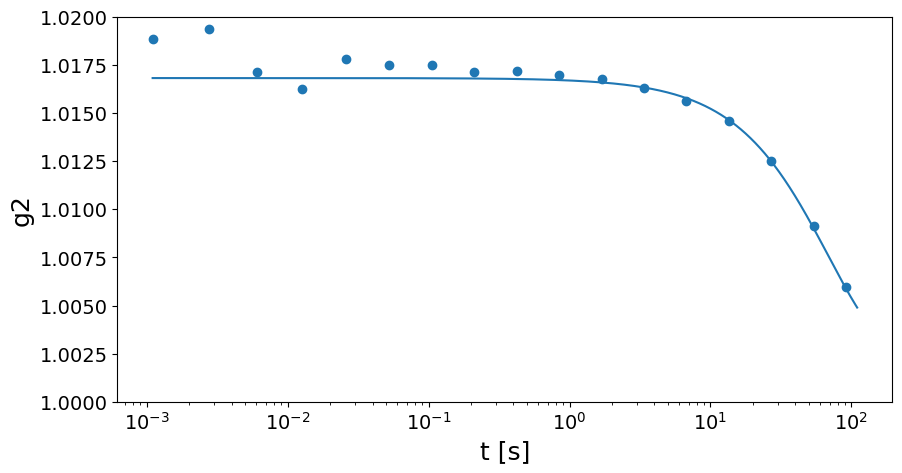

Parameters([('tau', <Parameter 'tau', value=np.float64(68.40875490354836) +/- 3.53, bounds=[0:1000000.0]>), ('beta', <Parameter 'beta', value=np.float64(1.122305554970322) +/- 0.0412, bounds=[0:2]>), ('c', <Parameter 'c', value=np.float64(0.01457372363970344) +/- 0.00057, bounds=[0:1]>), ('y0', <Parameter 'y0', value=np.float64(1.0022448124647734) +/- 0.000493, bounds=[0:2]>)])

In [107]:
##################
t1_fit = 0
t2_fit = 1e10
##################

#####################################################
model = lm.Model(decorrelation_f)
params = lm.Parameters()
params.add('tau', value=1000, min=0, max=1e6)
params.add('beta', value=1, min=0, max=2)
params.add('c', value=.02, min=0, max=1)
params.add('y0', value=1, min=0, max=2)
#params.add('y0', value=1, vary=False)
#####################################################
 
plt.figure(figsize=(10,5))
g2_fit = pd.DataFrame(columns=['Q', 'dQ', 'tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
g2_fit.index.name = 't'
for i,k in enumerate(g2.keys()):
    #plt.scatter(t[k], g2[k], s=1,  c='C'+str(i), label = str(k)+'s')
    plt.scatter(t_mt[k], g2_mt[k], c='C'+str(i), label=str(k)+'s')

    x = t[k] [(t1_fit<t[k])*(t[k]<t2_fit)]
    y = g2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
    fit = model.fit(y, params, t=x)
    g2_fit.loc[k] = [Q, dq, fit.params['tau'].value, fit.params['beta'].value, fit.params['c'].value, fit.params['y0'].value, fit.params['tau'].stderr, fit.params['beta'].stderr, fit.params['c'].stderr, fit.params['y0'].stderr]

    x = np.arange(np.min(t[k]), np.max(t[k]), 1e-2)
    y = decorrelation_f(x, *g2_fit.loc[k].values[2:6])
    plt.plot(x, y,)

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.ylim(1, 1.02)
#plt.legend()
plt.show()

if Nbunch == 1:
    display(fit.params)
else:
    plt.figure(figsize=(10,5))
    plt.title('tau')
    plt.errorbar(g2_fit.index, g2_fit.tau,  yerr=g2_fit.dtau, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('tau [s]')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('beta')
    plt.errorbar(g2_fit.index, g2_fit.beta,  yerr=g2_fit.dbeta, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('beta')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('c')
    plt.errorbar(g2_fit.index, g2_fit.c,  yerr=g2_fit.dc, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('c')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('y0')
    plt.errorbar(g2_fit.index, g2_fit.y0,  yerr=g2_fit.dy0, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('y0')
    plt.tight_layout(); plt.show()

### Linear by dose

In [48]:
t_ff = e4m_data.shape[0]*itime
print('#############################')
print('Nff =    =',e4m_data.shape[0], ' =>  t_ff =', t_ff)
print('#############################\n')

#############################
Nff =    = 50990580  =>  t_ff = 56089.638000000006
#############################



In [50]:
t_segments = [
    (0, 1.5e3),
    (1.5e3, 4.5e3),
    (4.5e3, 7.5e3),
    (7.5e3, 12e3),
    (12e3, 17.5e3),
    (17.5e3, 23e3),
    (23e3, 30e3),
    (30e3, 37e3),
    (37e3, 42e3),
    (42e3, 56089),
]

Nf_segments =  [(int(t_segments[i][0]//itime), int(t_segments[i][1]//itime)) for i in range(len(t_segments))]

In [53]:
from contextlib import redirect_stdout
import io

###################
Lbin = 1000
bin2dense = False
mask = None
###################

t_g2, g2= {}, {}
for i in tqdm(range(len(Nf_segments))):
    with redirect_stdout(io.StringIO()):
        Nfi = Nf_segments[i][0]
        Nff = Nf_segments[i][1]
        G2t = XPCS.get_G2t(e4m_data, mask=mask, Nfi=Nfi, Nff=Nff, Lbin=Lbin, bin2dense=bin2dense)

        t_bunch = Nfi*itime + (Nff-Nfi)/2*itime
        t_g2[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t), cython=True)
np.savez(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq), t_g2=t_g2, g2=g2)

100%|██████████| 10/10 [09:39<00:00, 57.95s/it] 


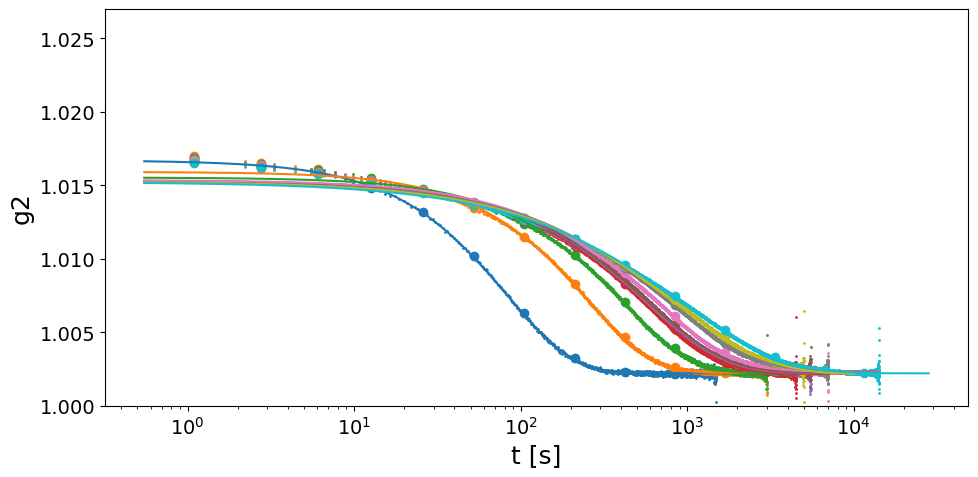

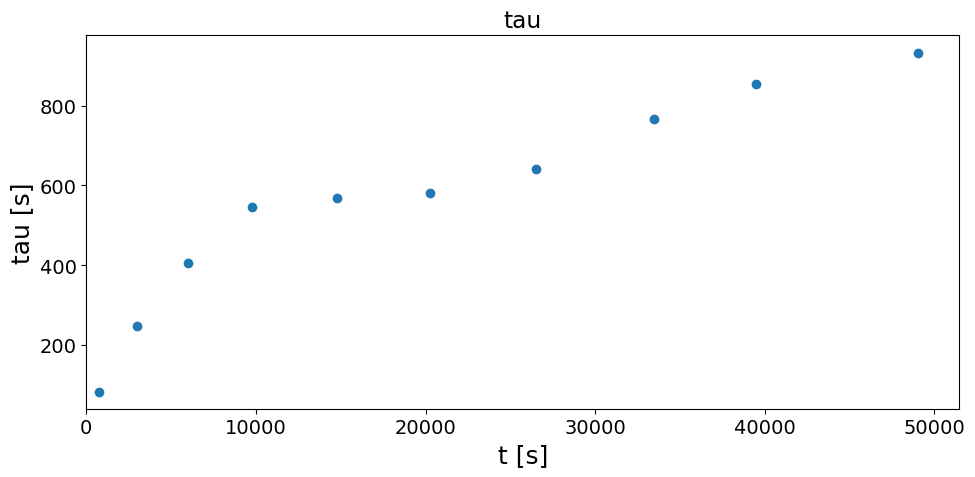

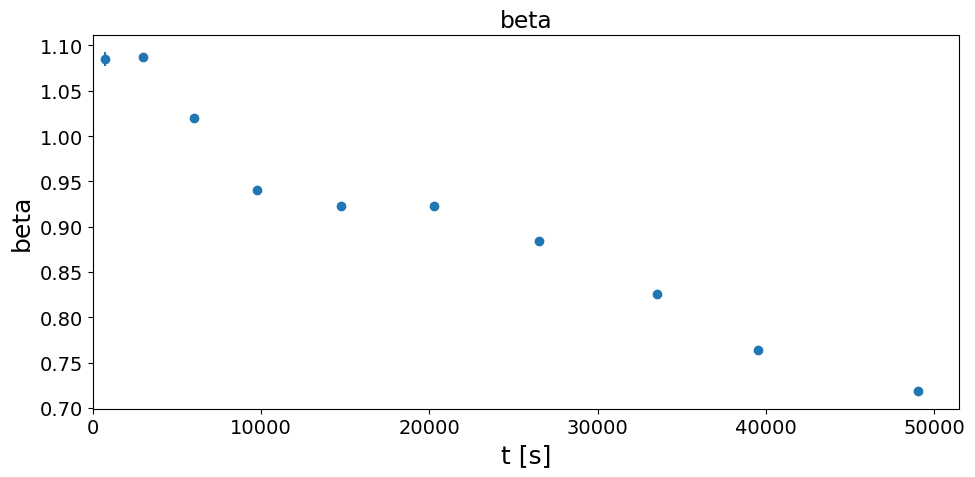

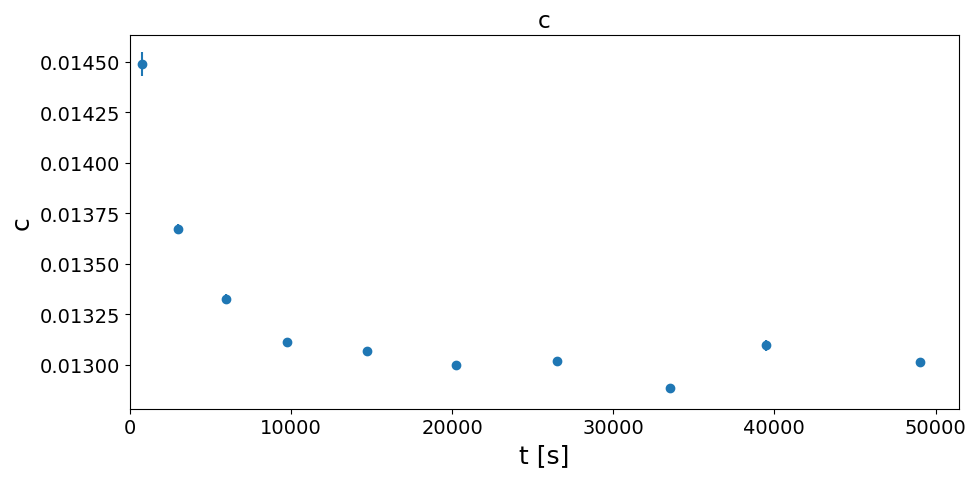

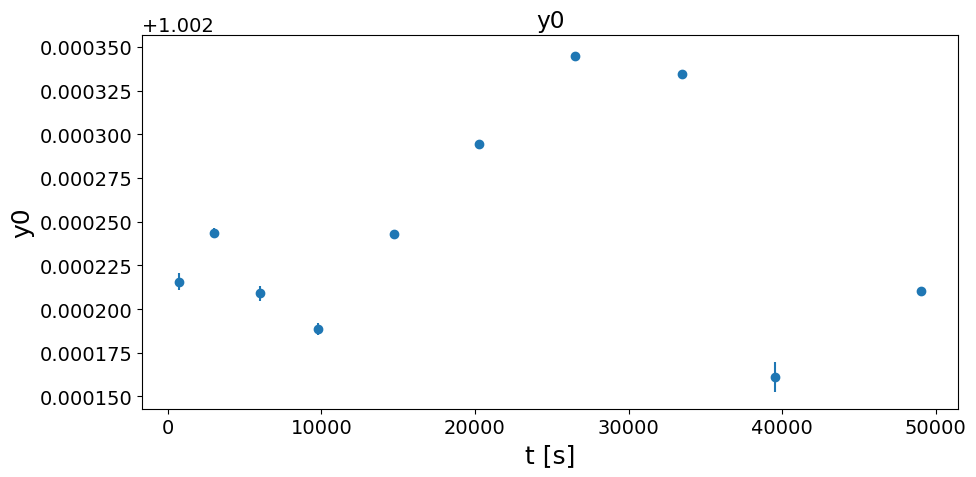

In [54]:
##################
t1_fit = 0
t2_fit = 1e10
##################

#####################################################
model = lm.Model(decorrelation_f)
params = lm.Parameters()
params.add('tau', value=1000, min=0, max=1e6)
params.add('beta', value=1, min=0, max=2)
params.add('c', value=.02, min=0, max=1)
params.add('y0', value=1, min=0, max=2)
#params.add('y0', value=1, vary=False)
#####################################################
 
plt.figure(figsize=(10,5))
g2_fit = pd.DataFrame(columns=['Q', 'dQ', 'tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
g2_fit.index.name = 't'
for i,k in enumerate(g2.keys()):
    plt.scatter(t_g2[k], g2[k], s=1,  c='C'+str(i), label = str(k)+'s')
    t_mt, g2_mt = XPCS.get_g2mt_fromling2(itime*Lbin, g2[k])
    plt.scatter(t_mt, g2_mt, c='C'+str(i), label=str(k)+'s')

    x = t_g2[k] [(t1_fit<t_g2[k])*(t_g2[k]<t2_fit)]
    y = g2[k][(t1_fit<t_g2[k])*(t_g2[k]<t2_fit)]
    fit = model.fit(y, params, t=x)
    g2_fit.loc[k] = [Q, dq, fit.params['tau'].value, fit.params['beta'].value, fit.params['c'].value, fit.params['y0'].value, fit.params['tau'].stderr, fit.params['beta'].stderr, fit.params['c'].stderr, fit.params['y0'].stderr]

    x = np.arange(np.min(t_g2[k])/2, np.max(t_g2[k])*2, 1e-2)
    y = decorrelation_f(x, *g2_fit.loc[k].values[2:6])
    plt.plot(x, y,)

g2_fit.to_csv(g2fit_folder+'g2fit_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq)+'.csv')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.ylim(1, 1.027)
#plt.legend()
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.title('tau')
plt.errorbar(g2_fit.index, g2_fit.tau,  yerr=g2_fit.dtau, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('tau [s]')
plt.xlim(0)
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.title('beta')
plt.errorbar(g2_fit.index, g2_fit.beta,  yerr=g2_fit.dbeta, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('beta')
plt.xlim(0)
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.title('c')
plt.errorbar(g2_fit.index, g2_fit.c,  yerr=g2_fit.dc, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('c')
plt.xlim(0)
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.title('y0')
plt.errorbar(g2_fit.index, g2_fit.y0,  yerr=g2_fit.dy0, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('y0')
plt.tight_layout(); plt.show()

### Multi-tau Correlation (TO BE REORDER!!!)

In [108]:
XPCS.print_Nf_choices(len(scan['fast_timer_period']))

       Nf = 50995581    =>    log2(Nf) = 25.6
----------------------------------------------------
  reduced Nf  dense depth (2^x)  thrown frames %  thrown frames
0      2**25                 24             34.2       17441149
1    3*2**24                 23              1.0         663933
2   97*2**19                 18              0.0         139645
3  389*2**17                 16              0.0           8573
----------------------------------------------------


In [109]:
##### INPUTS #####
Nfi = 0
Nff = 0 +3*2**24
sparse_depth = 13
dense_depth = 23
##################

G2tmt = XPCS.get_G2tmt_4sparse(e4m_data, sparse_depth, dense_depth, Nfi, Nff, mask=None)
#G2tmt = XPCS.get_G2tmt_4sparse_bypartialloading(RAW_folder, sample_name, Ndataset, Nscan, sparse_depth, dense_depth, Nfi, Nff, mask = load_mask, n_jobs=1)
t_mt, g2_mt, dg2_mt = XPCS.get_g2mt(itime, G2tmt)

Loading frames ...
Done! (elapsed time = 100.81 s)
	 | 50331648 frames X 210139 pixels
	 | sparsity = 1.09e-03
	 | memory usage (sparse.csr_array @ float32) = 128.802 GB
Computing sparse multitau G2t...


100%|██████████| 6144/6144 [27:11<00:00,  3.77it/s]


Done! (elapsed time = 1631.77 s)
Computing dense multitau G2t...


100%|██████████| 10/10 [00:02<00:00,  3.79it/s]


Done! (elapsed time = 2.64 s)


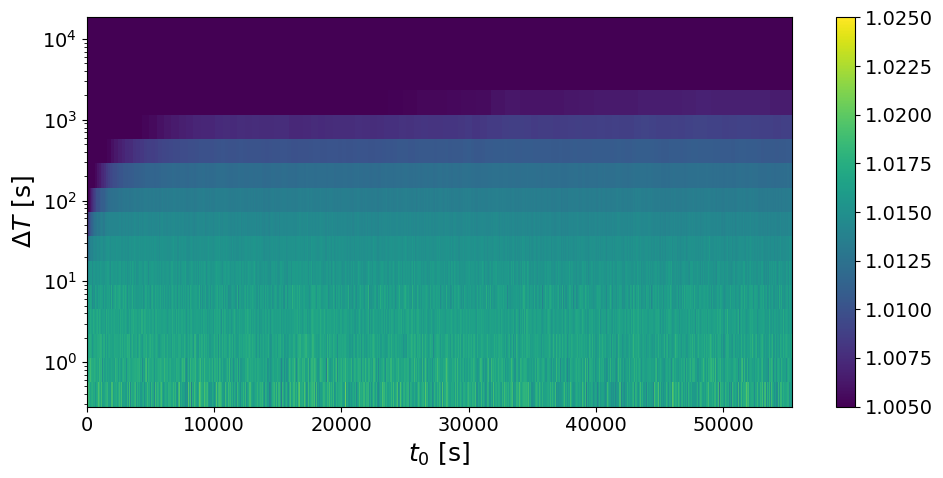

In [ ]:
############################
vmin, vmax = 1.005, 1.02
lower_mt = 8
filter_layer = 12
############################

XPCS.plot_G2tmt(G2tmt, itime, vmin, vmax, yscale='log', lower_mt=lower_mt, filter_layer=filter_layer)

In [116]:
cut1 = XPCS.cut_G2tmt(itime, G2tmt, tmin=None, tmax=3000)
cut2 = XPCS.cut_G2tmt(itime, G2tmt, tmin=3000, tmax=6000)
cut3 = XPCS.cut_G2tmt(itime, G2tmt, tmin=6000, tmax=15000)
cut4 = XPCS.cut_G2tmt(itime, G2tmt, tmin=15000, tmax=30000)
cut5 = XPCS.cut_G2tmt(itime, G2tmt, tmin=30000, tmax=60000)
t_mt_1, g2_mt_1, dg2_mt_1 = XPCS.get_g2mt(itime, cut1)
t_mt_2, g2_mt_2, dg2_mt_2 = XPCS.get_g2mt(itime, cut2)
t_mt_3, g2_mt_3, dg2_mt_3 = XPCS.get_g2mt(itime, cut3)
t_mt_4, g2_mt_4, dg2_mt_4 = XPCS.get_g2mt(itime, cut4)
t_mt_5, g2_mt_5, dg2_mt_5 = XPCS.get_g2mt(itime, cut5)

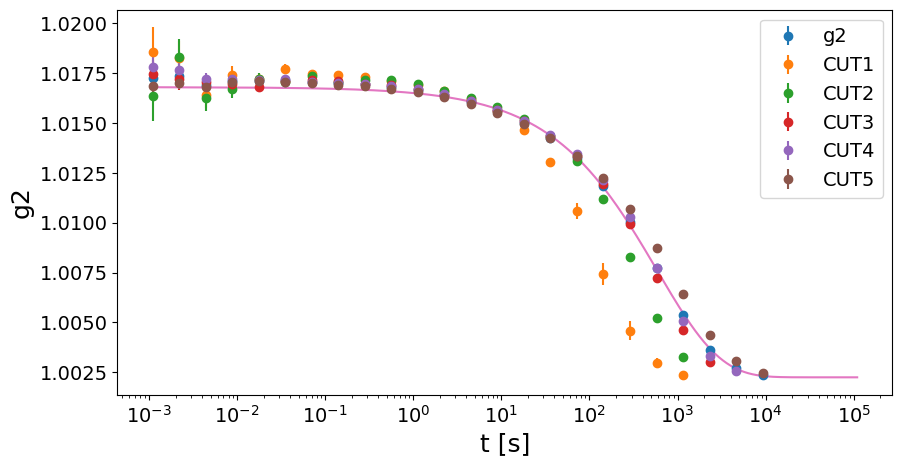

tau = 587.6658091168835 +/- 20.1559778137467
beta = 0.6089817925833586 +/- 0.016188833997585438
c = 0.01455939185484264 +/- 0.00017382499033432498
y0 = 1.002245684046683 +/- 0.00011472650347059915


In [117]:
##################
t1_fit = 1
t2_fit = 1e8
##################

plt.figure(figsize=(10,5))
plt.errorbar(t_mt, g2_mt, yerr=dg2_mt, fmt='o', label='g2')
plt.errorbar(t_mt_1, g2_mt_1, yerr=dg2_mt_1, fmt='o', label='CUT1')
plt.errorbar(t_mt_2, g2_mt_2, yerr=dg2_mt_2, fmt='o', label='CUT2')
plt.errorbar(t_mt_3, g2_mt_3, yerr=dg2_mt_3, fmt='o', label='CUT3')
plt.errorbar(t_mt_4, g2_mt_4, yerr=dg2_mt_4, fmt='o', label='CUT4')
plt.errorbar(t_mt_5, g2_mt_5, yerr=dg2_mt_5, fmt='o', label='CUT5')


popt, pcov = curve_fit(decorrelation_f, t_mt[(t1_fit<t_mt)*(t_mt<t2_fit)], g2_mt[(t1_fit<t_mt)*(t_mt<t2_fit)], p0=[1000, .8, .04, 1], bounds=([0, 0, 0, .9999], [np.inf, np.inf, np.inf, 1.1]))
x = np.arange(np.min(t_mt), np.max(t_mt)+1e5, 1e-2)
y = decorrelation_f(x, *popt)
plt.plot(x, y,)

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.legend()
plt.show()


print(f'tau = {popt[0]} +/- {np.sqrt(pcov[0,0])}')
print(f'beta = {popt[1]} +/- {np.sqrt(pcov[1,1])}')
print(f'c = {popt[2]} +/- {np.sqrt(pcov[2,2])}')
print(f'y0 = {popt[3]} +/- {np.sqrt(pcov[3,3])}')


## XPCS scan: delcoup=10, (Ta2O5_2.5um_asdep, 2, 7)  

Tantala as deposited

#############################
command = mtimescan 0.001 2 86000367
Ei = 21.669991317784486
itime = 0.0011
T =  0.1398225277777778 h
theta = 10.4
Qc = 1.99
#############################



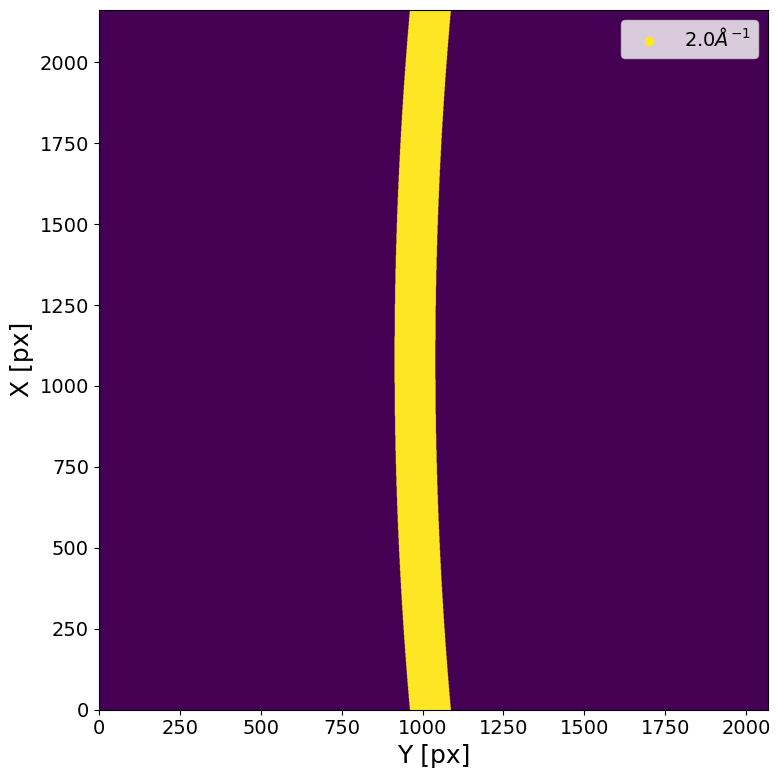

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00050.h5 (51/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00051.h5 (52/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00052.h5 (53/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00053.h5 (54/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00054.h5 (55/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00055.h5 (56/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00056.h5 (57/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00057.h5 (58/91 loops)
	 -> loading file eiger4m_v2_sparse_frame_0

In [ ]:
#######################################
sample_name = 'Ta2O5_2.5um_asdep'
Ndataset = 2
Nscan = 9
#######################################

scan = ID10.load_scan(RAW_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
T = scan['fast_timer_period'].size*itime
theta = scan['delcoup']
Qc = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('T = ', T/60**2, 'h')
print('theta =', theta)
print('Qc =', Qc)
print('#############################\n')

#################################################################################
Nfi, Nff = None, len(scan['fast_timer_trig'])-5001
Q = 2.0
dq = 0.01
Qmask = XPCS.gen_Qmask(Ei, theta, Q, dq, Qmap_plot=False)
Kossel_mask = np.load(MASKS_folder+'Kossel_mask_Ta2O5_2.5um_asdep_0002_0001.npy')
load_mask = e4m_mask*e4m_htmask*Qmask#*Kossel_mask
##################################################################################

e4m_data = ID10.load_sparse_e4m(RAW_folder, sample_name, Ndataset, Nscan, Nfi=Nfi, Nff=Nff, load_mask=load_mask, n_jobs=50, )

### Flux check

################################################################################
Maximum count in the whole run -> 4.0
# of pixels above Ith_high treshold ->  4275322 pixels (of 4471016 => 95.62 %)
# of pixels below Ith_low treshold ->  0 pixels (of 4471016 => 0.0 %)
################################################################################



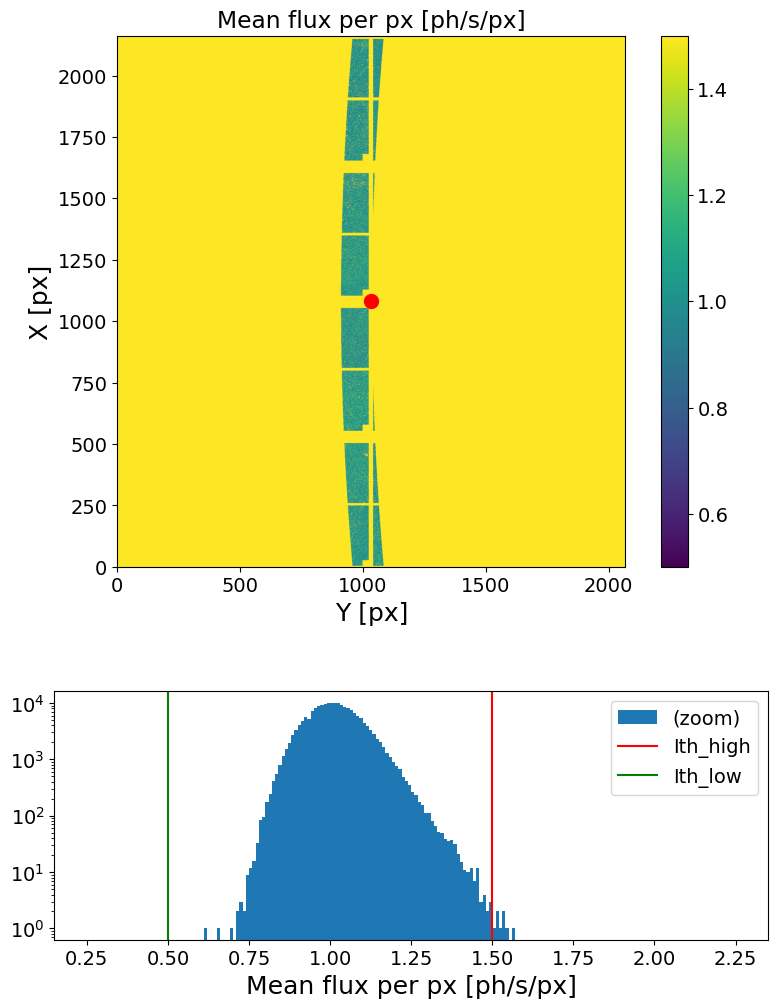

In [ ]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_low=.5, Ith_high=1.5, Nfi=None, Nff=int(1e7), load_mask=load_mask, mask=None)

### Intensity analysis

In [ ]:
####################
Lbin = 100
Nstep = 1000
mask = None
Nfi = None
Nff = None
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep, Nfi=Nfi, Nff=Nff)
np.savez(It_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq), t_It=t_It, It=It)

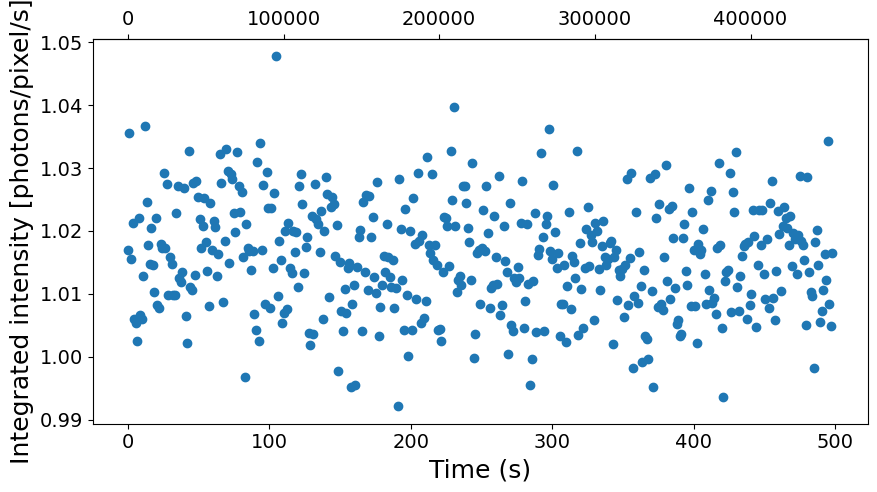

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))
#plt.xscale('log')
plt.show()

### Pilatus

In [ ]:
##############################################################################
Nfi, Nff =  0, None
Nstep = 3000
#######################################

pilatus_data = ID10.load_pilatus(RAW_folder, sample_name, Ndataset, Nscan, Nfi=Nfi, Nff=Nff, Nstep=Nstep)

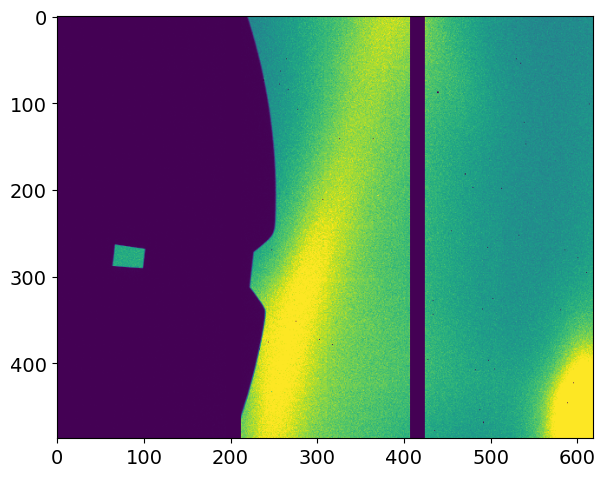

In [ ]:
#################
Nf_pilatus = 0
#################

plt.figure(figsize=(10, 5))
plt.imshow(pilatus_data[Nf_pilatus].T, vmin=0, vmax=500)
plt.tight_layout(); plt.show()

Computing azimuthal integration...


100%|██████████| 3/3 [00:00<00:00, 33.26it/s]

Done! (elapsed time = 0.09 s)


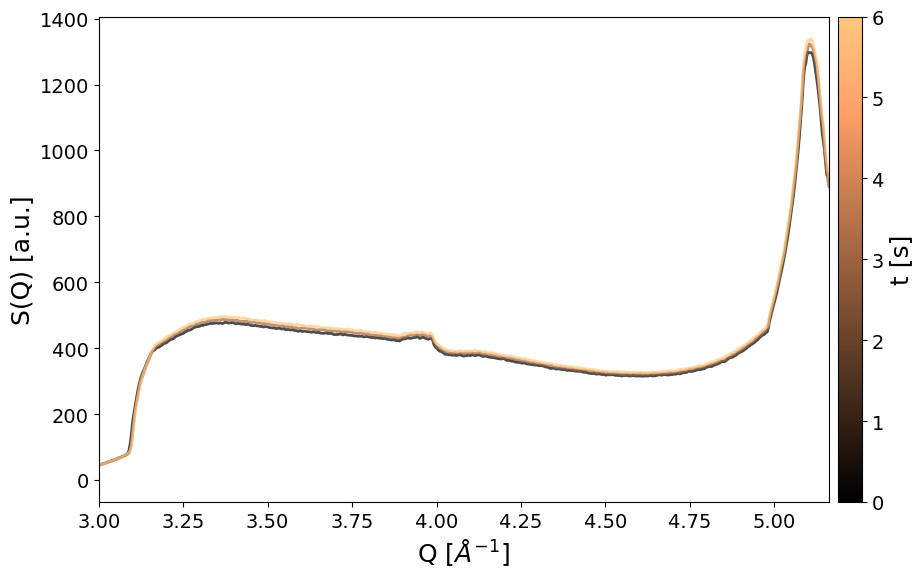

In [ ]:
q, Sq, dSq = XPCS.get_Sq(pilatus_data, ponifile=pilatus_LaB6_poni, mask=pilatus_mask)
XPCS.plot_Sq(q, Sq, itime=2, xlims=(3,q[-1]))

### Linear correlation 4 tests

In [ ]:
###################
Nfi = None
Nff = int(1e6)
Lbin = 100
bin2dense = False
mask = None
###################
if Lbin is None: Lbin=1

G2t = XPCS.get_G2t(e4m_data, mask=mask, Nfi=Nfi, Nff=Nff, Lbin=Lbin, bin2dense=bin2dense)

Loading frames ...
Done! (elapsed time = 0.13 s)
Binning frames (Lbin = 100, using MKL library) ...
Done! (elapsed time = 0.46 s)
	 | 4526 frames X 195702 pixels
	 | sparsity = 1.05e-01
	 | memory usage (sparse.csr_array @ float32) = 1.036 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 2.49 s)
	 | 4526 X 4526 squared matrix
	 | memory usage (np.array @ float32) = 0.076 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 0.04 s)



In [ ]:
############################
t1, t2 = 0, 15000
vmin, vmax = 1.0, 1.03
############################
#XPCS.plot_G2t(G2t, vmin, vmax, itime*Lbin, t1=t1, t2=t2, sigma_filter=None)

In [ ]:
################
Nbunch = 1
################

NfXbunch = int(G2t.shape[0]/Nbunch)
t, g2, dg2, t_mt, g2_mt = {}, {}, {}, {}, {}
for n in range(Nbunch):
    if Nfi is None: Nfi = 0
    t_bunch = Nfi*itime + round(itime*Lbin*NfXbunch*(n+1/2),1)

    if Nbunch!=1: t[t_bunch], g2[t_bunch], dg2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t[NfXbunch*n:NfXbunch*(n+1), NfXbunch*n:NfXbunch*(n+1)]), cython=False)
    else:         t[t_bunch], g2[t_bunch], dg2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t), cython=False)
    t_mt[t_bunch], g2_mt[t_bunch] = XPCS.get_g2mt_fromling2(itime*Lbin, g2[t_bunch])    


Computing g2...
Done! (elapsed time = 0.03 s)



/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


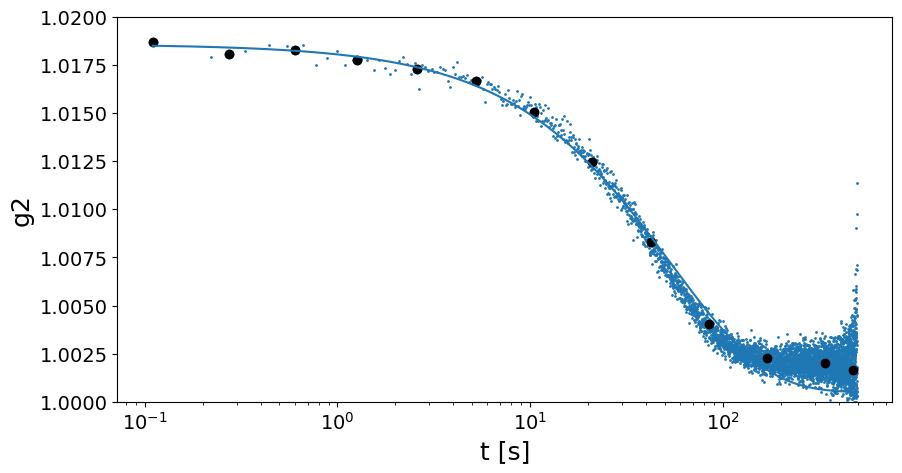

Parameters([('tau', <Parameter 'tau', value=np.float64(54.132558554131904) +/- 4.02, bounds=[0:1000000.0]>), ('beta', <Parameter 'beta', value=np.float64(0.8823749726905068) +/- 0.0831, bounds=[0:2]>), ('c', <Parameter 'c', value=np.float64(0.018074201001663126) +/- 0.00038, bounds=[0:1]>), ('y0', <Parameter 'y0', value=1.0005 (fixed), bounds=[-inf:inf]>)])

Exception ignored in: <function ResourceTracker.__del__ at 0x75a50a3a3ce0>
Traceback (most recent call last):
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7bc0f929fce0>
Traceback (most recent call last):
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", li

In [ ]:
##################
t1_fit = 0
t2_fit = 1e100
##################

#####################################################
model = lm.Model(decorrelation_f)
params = lm.Parameters()
params.add('tau', value=1000, min=0, max=1e6)
params.add('beta', value=1, min=0, max=2)
params.add('c', value=.02, min=0, max=1)
#params.add('y0', value=1, min=0, max=2)
params.add('y0', value=1.0005, vary=False)
#####################################################
 
plt.figure(figsize=(10,5))
g2_fit = pd.DataFrame(columns=['Q', 'dQ', 'tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
g2_fit.index.name = 't'
for i,k in enumerate(g2.keys()):
    plt.scatter(t[k], g2[k], s=1,  c='C'+str(i), label = str(k)+'s')
    plt.scatter(t_mt[k], g2_mt[k], c='C'+str(i), label=str(k)+'s')
    plt.scatter(t_mt[k], g2_mt[k], c='black', label=str(k)+'s')

    x = t[k] [(t1_fit<t[k])*(t[k]<t2_fit)]
    y = g2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
    x = t_mt[k] [(t1_fit<t_mt[k])*(t_mt[k]<t2_fit)]
    y = g2_mt[k][(t1_fit<t_mt[k])*(t_mt[k]<t2_fit)]
    fit = model.fit(y, params, t=x)
    g2_fit.loc[k] = [Q, dq, fit.params['tau'].value, fit.params['beta'].value, fit.params['c'].value, fit.params['y0'].value, fit.params['tau'].stderr, fit.params['beta'].stderr, fit.params['c'].stderr, fit.params['y0'].stderr]

    x = np.arange(np.min(t[k]), np.max(t[k]), 1e-2)
    y = decorrelation_f(x, *g2_fit.loc[k].values[2:6])
    plt.plot(x, y,)

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.ylim(1, 1.02)
#plt.legend()
plt.show()

if Nbunch == 1:
    display(fit.params)
else:
    plt.figure(figsize=(10,5))
    plt.title('tau')
    plt.errorbar(g2_fit.index, g2_fit.tau,  yerr=g2_fit.dtau, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('tau [s]')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('beta')
    plt.errorbar(g2_fit.index, g2_fit.beta,  yerr=g2_fit.dbeta, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('beta')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('c')
    plt.errorbar(g2_fit.index, g2_fit.c,  yerr=g2_fit.dc, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('c')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('y0')
    plt.errorbar(g2_fit.index, g2_fit.y0,  yerr=g2_fit.dy0, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('y0')
    plt.tight_layout(); plt.show()

## XPCS scan: delcoup=10, T=24h (Ta2O5_2.5um_asdep, 4, 1)  

Tantala as deposited

#############################
command = mtimescan 0.001 2 86000367
Ei = 21.669991317784486
itime = 0.0011
T =  0.1227153888888889 h
theta = 10.4
Qc = 1.99
#############################



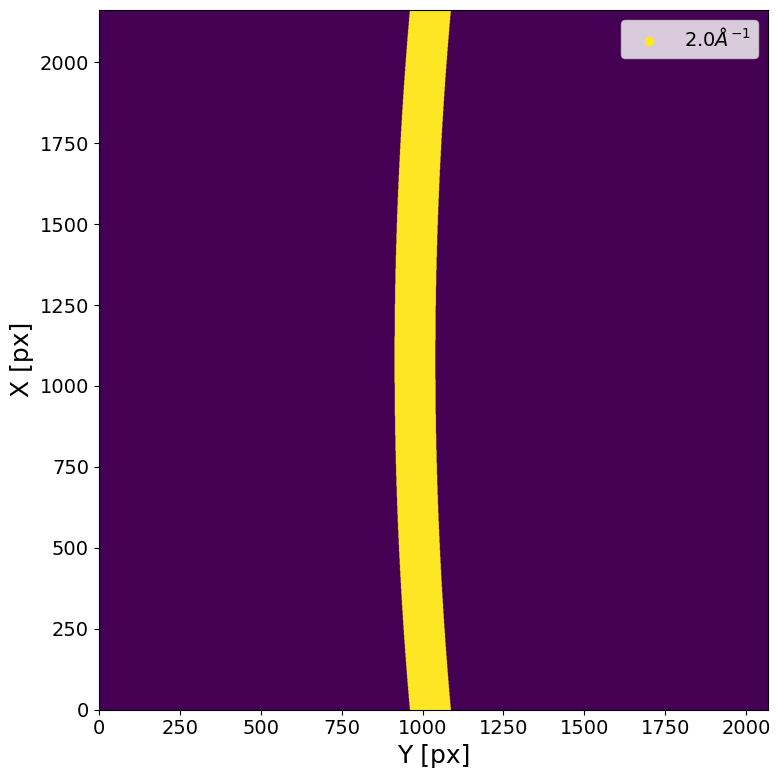

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00050.h5 (51/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00051.h5 (52/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00052.h5 (53/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00053.h5 (54/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00054.h5 (55/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00055.h5 (56/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00056.h5 (57/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00057.h5 (58/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00058.h5 (59/80 loops)
	 -> loading file eiger4m_v2_sparse_frame_

In [5]:
#######################################
sample_name = 'Ta2O5_2.5um_asdep'
Ndataset = 4
Nscan = 1
#######################################

scan = ID10.load_scan(RAW_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
T = scan['fast_timer_period'].size*itime
theta = scan['delcoup']
Qc = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('T = ', T/60**2, 'h')
print('theta =', theta)
print('Qc =', Qc)
print('#############################\n')

#################################################################################
Nfi, Nff = None, len(scan['fast_timer_period'])-5001
Qmask = XPCS.gen_Qmask(Ei, theta, Q, dq, Qmap_plot=False)
load_mask = e4m_mask*e4m_htmask*Qmask
##################################################################################

e4m_data = ID10.load_sparse_e4m(RAW_folder, sample_name, Ndataset, Nscan, Nfi=Nfi, Nff=Nff, load_mask=load_mask, n_jobs=50, )

### Flux check

################################################################################
Maximum count in the whole run -> 4.0
# of pixels above Ith_high treshold ->  4275314 pixels (of 4471016 => 95.62 %)
################################################################################



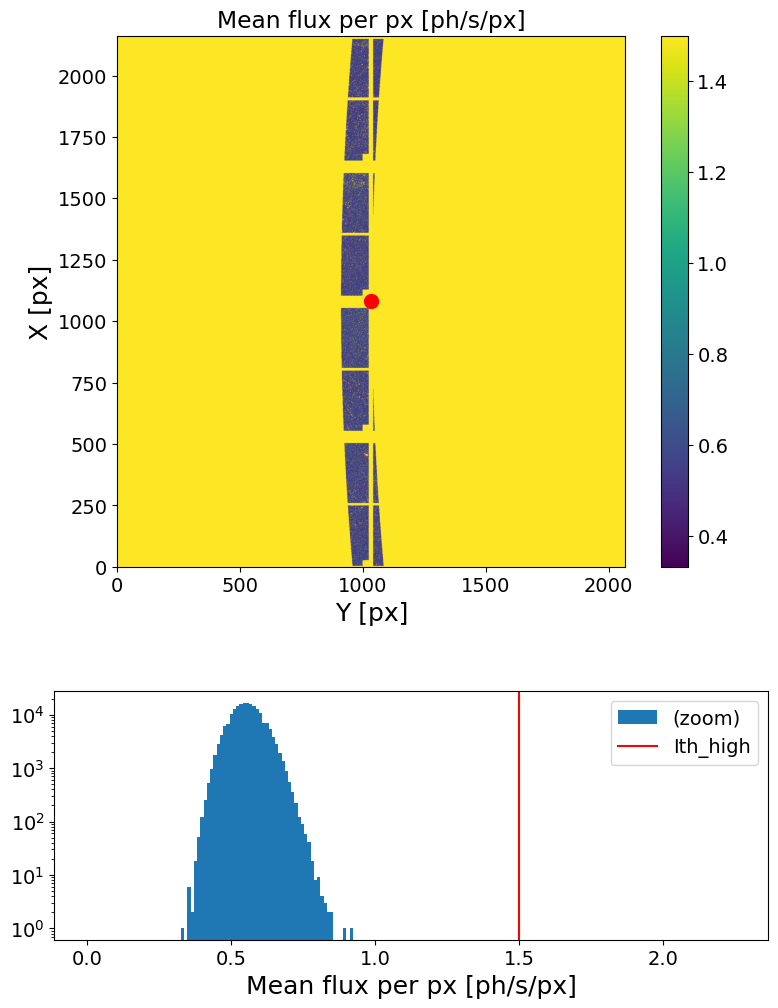

In [6]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=1.5, Nfi=None, Nff=int(1e7), load_mask=load_mask, mask=None)

### Intensity analysis

In [9]:
####################
Lbin = 10
Nstep = 10
mask = None
Nfi = None
Nff = None
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep, Nfi=Nfi, Nff=Nff)
np.savez(It_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq), t_It=t_It, It=It)

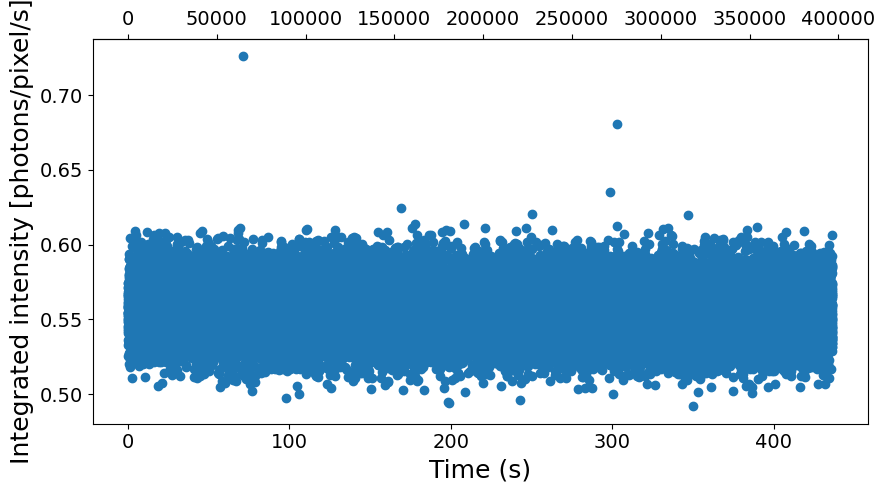

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))
#plt.xscale('log')
plt.show()

### Pilatus

In [19]:
#######################################
Nfi, Nff =  0, 5000
Nstep = 50
#######################################

pilatus_data = ID10.load_pilatus(RAW_folder, sample_name, Ndataset, Nscan, Nfi=Nfi, Nff=Nff, Nstep=Nstep)

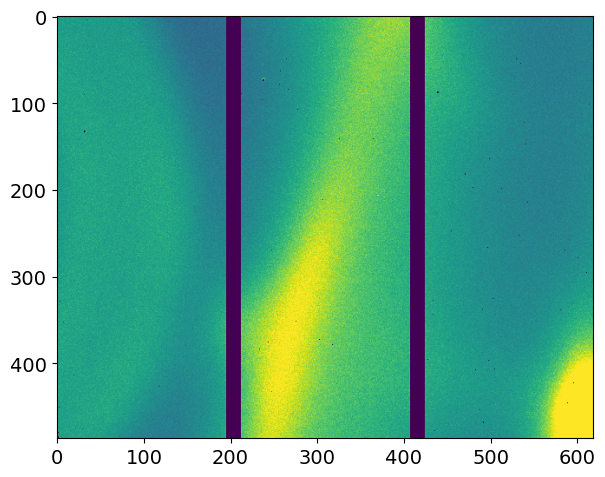

In [20]:
#################
Nf_pilatus = 0
#################

plt.figure(figsize=(10, 5))
plt.imshow(pilatus_data[Nf_pilatus].T, vmin=0, vmax=500)
plt.tight_layout(); plt.show()

Computing azimuthal integration...


100%|██████████| 8/8 [00:00<00:00, 97.35it/s]

Done! (elapsed time = 0.08 s)


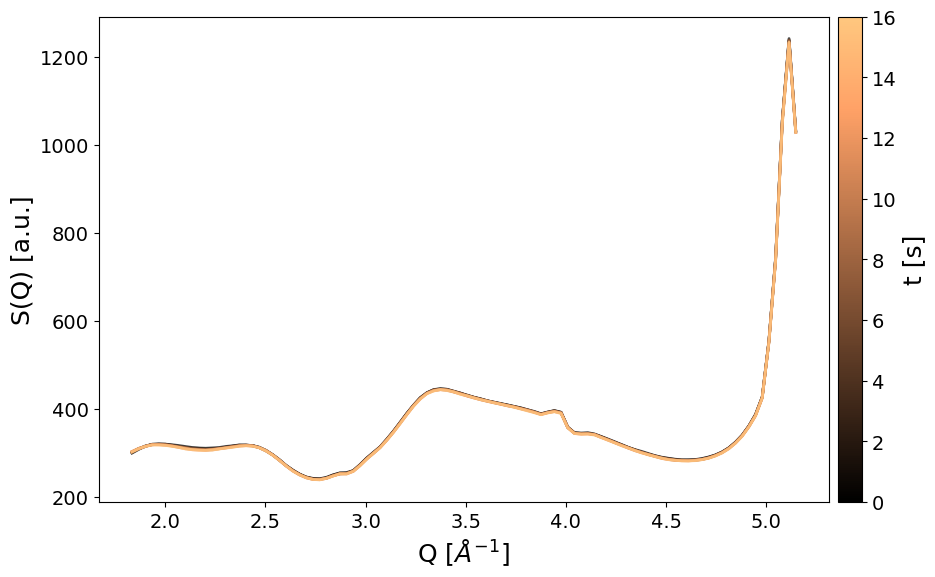

In [21]:
q, Sq, dSq = XPCS.get_Sq(pilatus_data, ponifile=pilatus_LaB6_poni, mask=pilatus_mask, npt=100)
XPCS.plot_Sq(q, Sq, itime=2)

### Linear correlation 4 tests

In [12]:
###################
Nfi = None
Nff = int(1e6)
Lbin = 10
bin2dense = False
mask = None
###################
if Lbin is None: Lbin=1

G2t = XPCS.get_G2t(e4m_data, mask=mask, Nfi=Nfi, Nff=Nff, Lbin=Lbin, bin2dense=bin2dense)

Loading frames ...
Done! (elapsed time = 0.09 s)
Binning frames (Lbin = 10, using MKL library) ...
Done! (elapsed time = 0.6 s)
	 | 39661 frames X 195702 pixels
	 | sparsity = 6.10e-03
	 | memory usage (sparse.csr_array @ float32) = 0.529 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 1.7 s)
	 | 39661 X 39661 squared matrix
	 | memory usage (np.array @ float32) = 5.86 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 1.04 s)



In [ ]:
############################
t1, t2 = 0, 15000
vmin, vmax = 1.0, 1.03
############################
#XPCS.plot_G2t(G2t, vmin, vmax, itime*Lbin, t1=t1, t2=t2, sigma_filter=None)

In [14]:
################
Nbunch = 1
################

NfXbunch = int(G2t.shape[0]/Nbunch)
t, g2, dg2, t_mt, g2_mt, dg2_mt = {}, {}, {}, {}, {}, {}
for n in range(Nbunch):
    if Nfi is None: Nfi = 0
    t_bunch = Nfi*itime + round(itime*Lbin*NfXbunch*(n+1/2),1)

    if Nbunch!=1: t[t_bunch], g2[t_bunch], dg2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t[NfXbunch*n:NfXbunch*(n+1), NfXbunch*n:NfXbunch*(n+1)]), cython=True)
    else:         t[t_bunch], g2[t_bunch], dg2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t), cython=True)
    t_mt[t_bunch], g2_mt[t_bunch], dg2_mt[t_bunch] = XPCS.get_g2mt_fromling2(itime*Lbin, g2[t_bunch],dg2[t_bunch])   


Computing g2 (using cython code)...
Done! (elapsed time = 0.9 s)



/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


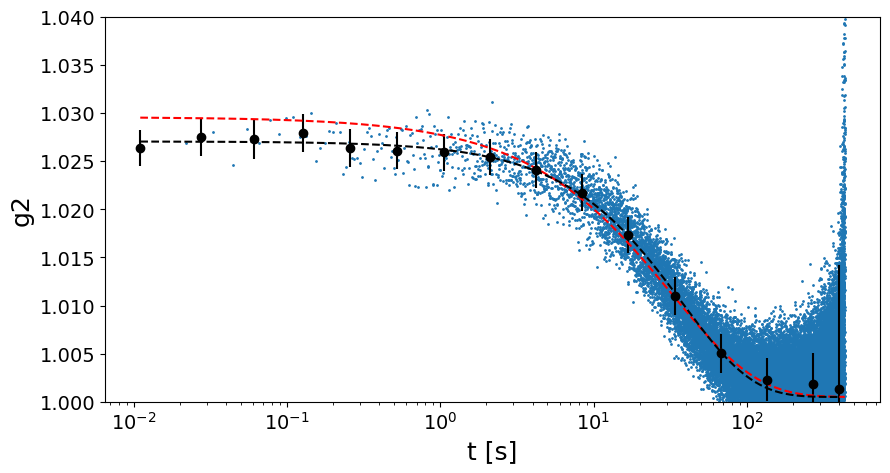

Parameters([('tau', <Parameter 'tau', value=np.float64(32.4580882261375) +/- 0.281, bounds=[0:1000000.0]>), ('beta', <Parameter 'beta', value=np.float64(0.7832201810910435) +/- 0.00548, bounds=[0:2]>), ('c', <Parameter 'c', value=np.float64(0.029081081134364813) +/- 0.000147, bounds=[0:1]>), ('y0', <Parameter 'y0', value=1.0005 (fixed), bounds=[-inf:inf]>)])

Parameters([('tau', <Parameter 'tau', value=np.float64(37.9922550070715) +/- 1.48, bounds=[0:1000000.0]>), ('beta', <Parameter 'beta', value=np.float64(0.9526896531527129) +/- 0.0474, bounds=[0:2]>), ('c', <Parameter 'c', value=np.float64(0.026552333643351706) +/- 0.000223, bounds=[0:1]>), ('y0', <Parameter 'y0', value=1.0005 (fixed), bounds=[-inf:inf]>)])

In [18]:
##################
t1_fit = 0
t2_fit = 8e2
##################

#####################################################
model = lm.Model(decorrelation_f)
params = lm.Parameters()
params.add('tau', value=50, min=0, max=1e6)
params.add('beta', value=0.8, min=0, max=2)
params.add('c', value=.02, min=0, max=1)
#params.add('y0', value=1, min=0, max=2)
params.add('y0', value=1.0005, vary=False)
#####################################################
 
plt.figure(figsize=(10,5))
g2_fit = pd.DataFrame(columns=['Q', 'dQ', 'tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
g2_fit.index.name = 't'
for i,k in enumerate(g2.keys()):
    plt.scatter(t[k], g2[k], s=1, c='C'+str(i), label = str(k)+'s')
    plt.errorbar(t_mt[k], g2_mt[k], yerr=dg2_mt[k], fmt = 'o',c='black', label=str(k)+'s')

    x = t[k] [(t1_fit<t[k])*(t[k]<t2_fit)]
    y = g2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
    dy = dg2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
    fit = model.fit(y, params, t=x, method='least_squares', weights=1/dy)
    g2_fit.loc[k] = [Q, dq, fit.params['tau'].value, fit.params['beta'].value, fit.params['c'].value, fit.params['y0'].value, fit.params['tau'].stderr, fit.params['beta'].stderr, fit.params['c'].stderr, fit.params['y0'].stderr]

    x = np.arange(np.min(t[k]), np.max(t[k]), 1e-2)
    y = decorrelation_f(x, *g2_fit.loc[k].values[2:6])
    plt.plot(x, y, c='red', linestyle='--')


    x = t_mt[k] [(t1_fit<t_mt[k])*(t_mt[k]<t2_fit)]
    y = g2_mt[k][(t1_fit<t_mt[k])*(t_mt[k]<t2_fit)]
    dy = dg2_mt[k][(t1_fit<t_mt[k])*(t_mt[k]<t2_fit)]
    fit_mt = model.fit(y, params, t=x, method='least_squares', weights=1/dy)
    g2_fit.loc[k] = [Q, dq, fit_mt.params['tau'].value, fit_mt.params['beta'].value, fit_mt.params['c'].value, fit_mt.params['y0'].value, fit_mt.params['tau'].stderr, fit_mt.params['beta'].stderr, fit_mt.params['c'].stderr, fit_mt.params['y0'].stderr]
    
    x= np.arange(np.min(t_mt[k]), np.max(t_mt[k]), 1e-2)
    y = decorrelation_f(x, *g2_fit.loc[k].values[2:6])
    plt.plot(x, y, c='black', linestyle='--')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.ylim(1, 1.04)
#plt.legend()
plt.show()

if Nbunch == 1:
    display(fit.params)
    display(fit_mt.params)
else:
    plt.figure(figsize=(10,5))
    plt.title('tau')
    plt.errorbar(g2_fit.index, g2_fit.tau,  yerr=g2_fit.dtau, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('tau [s]')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('beta')
    plt.errorbar(g2_fit.index, g2_fit.beta,  yerr=g2_fit.dbeta, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('beta')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('c')
    plt.errorbar(g2_fit.index, g2_fit.c,  yerr=g2_fit.dc, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('c')
    plt.xlim(0)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,5))
    plt.title('y0')
    plt.errorbar(g2_fit.index, g2_fit.y0,  yerr=g2_fit.dy0, fmt='o')
    plt.xlabel('t [s]')
    plt.ylabel('y0')
    plt.tight_layout(); plt.show()

### Linear by dose

In [ ]:
t_ff = e4m_data.shape[0]*itime
print('#############################')
print('Nff =    =',e4m_data.shape[0], ' =>  t_ff =', t_ff)
print('#############################\n')

#############################
Nff =    = 50990580  =>  t_ff = 56089.638000000006
#############################



In [ ]:
t_segments = [
    (0, 1.5e3),
    (1.5e3, 4.5e3),
    (4.5e3, 7.5e3),
    (7.5e3, 12e3),
    (12e3, 17.5e3),
    (17.5e3, 23e3),
    (23e3, 30e3),
    (30e3, 37e3),
    (37e3, 42e3),
    (42e3, 56089),
]

Nf_segments =  [(int(t_segments[i][0]//itime), int(t_segments[i][1]//itime)) for i in range(len(t_segments))]

In [ ]:
from contextlib import redirect_stdout
import io

###################
Lbin = 1000
bin2dense = False
mask = None
###################

t_g2, g2= {}, {}
for i in tqdm(range(len(Nf_segments))):
    with redirect_stdout(io.StringIO()):
        Nfi = Nf_segments[i][0]
        Nff = Nf_segments[i][1]
        G2t = XPCS.get_G2t(e4m_data, mask=mask, Nfi=Nfi, Nff=Nff, Lbin=Lbin, bin2dense=bin2dense)

        t_bunch = Nfi*itime + (Nff-Nfi)/2*itime
        t_g2[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t), cython=True)
np.savez(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq), t_g2=t_g2, g2=g2)

100%|██████████| 10/10 [09:39<00:00, 57.95s/it] 


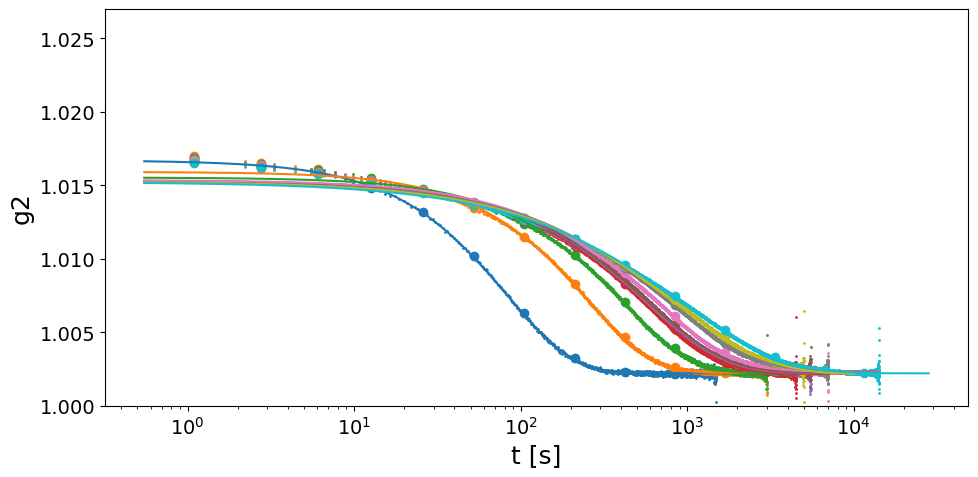

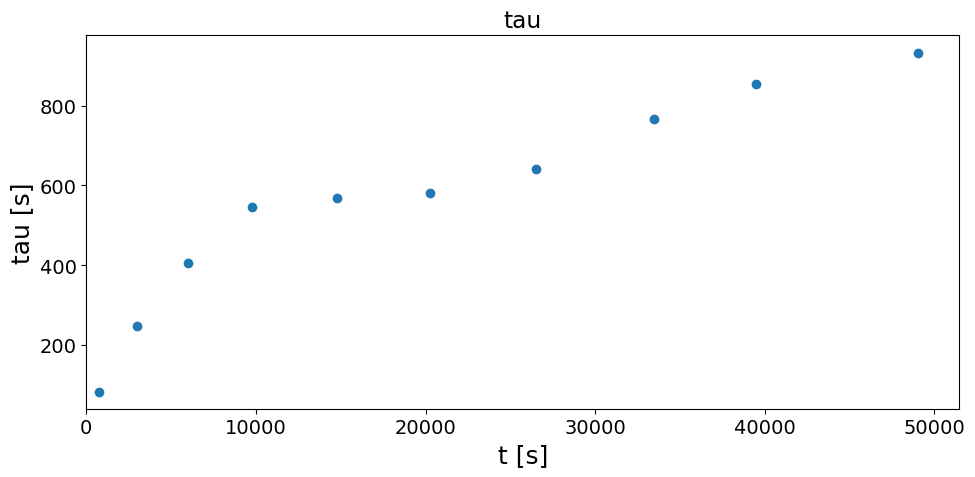

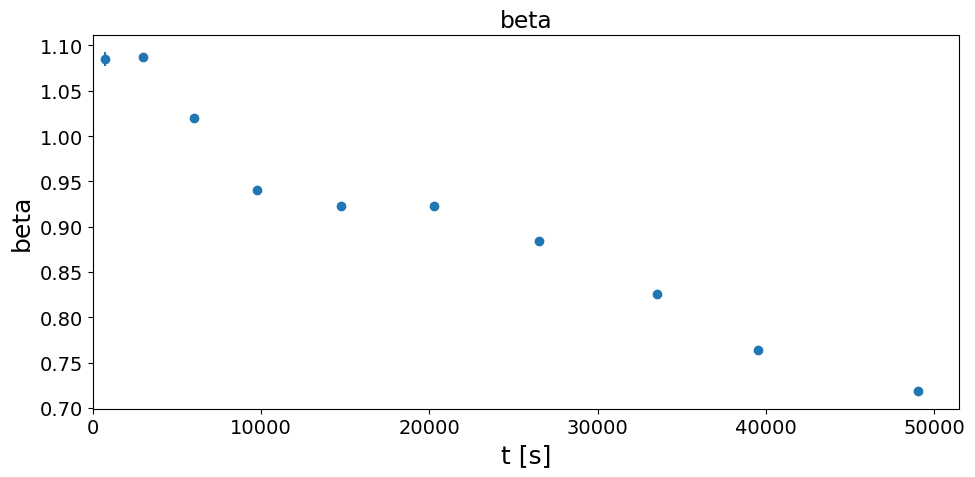

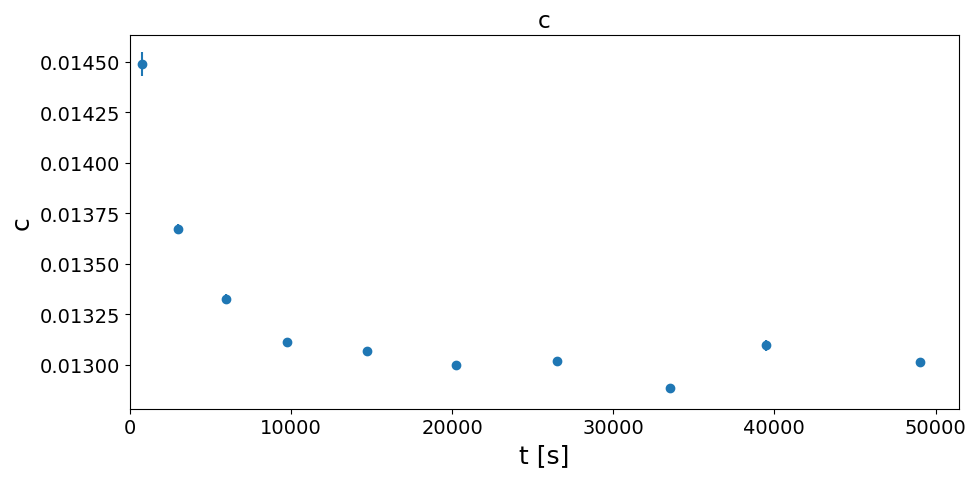

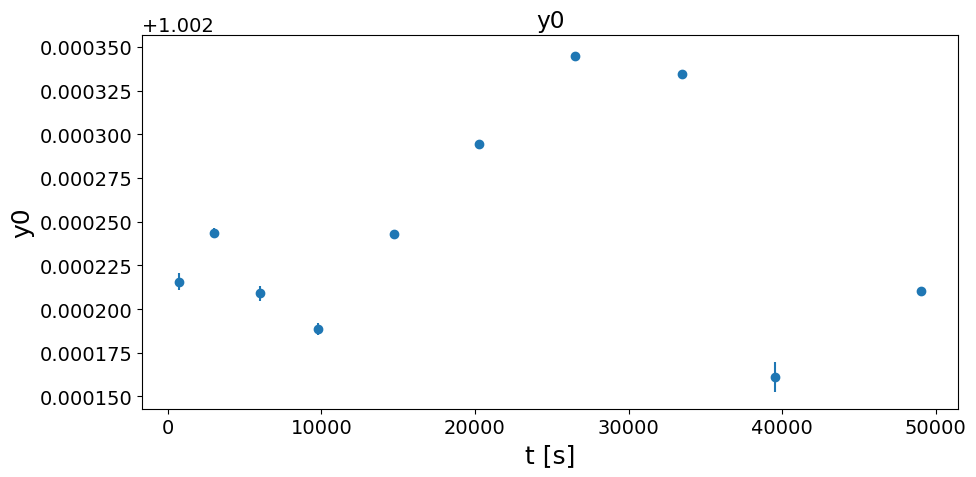

In [ ]:
##################
t1_fit = 0
t2_fit = 1e10
##################

#####################################################
model = lm.Model(decorrelation_f)
params = lm.Parameters()
params.add('tau', value=1000, min=0, max=1e6)
params.add('beta', value=1, min=0, max=2)
params.add('c', value=.02, min=0, max=1)
params.add('y0', value=1, min=0, max=2)
#params.add('y0', value=1, vary=False)
#####################################################
 
plt.figure(figsize=(10,5))
g2_fit = pd.DataFrame(columns=['Q', 'dQ', 'tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
g2_fit.index.name = 't'
for i,k in enumerate(g2.keys()):
    plt.scatter(t_g2[k], g2[k], s=1,  c='C'+str(i), label = str(k)+'s')
    t_mt, g2_mt = XPCS.get_g2mt_fromling2(itime*Lbin, g2[k])
    plt.scatter(t_mt, g2_mt, c='C'+str(i), label=str(k)+'s')

    x = t_g2[k] [(t1_fit<t_g2[k])*(t_g2[k]<t2_fit)]
    y = g2[k][(t1_fit<t_g2[k])*(t_g2[k]<t2_fit)]
    fit = model.fit(y, params, t=x)
    g2_fit.loc[k] = [Q, dq, fit.params['tau'].value, fit.params['beta'].value, fit.params['c'].value, fit.params['y0'].value, fit.params['tau'].stderr, fit.params['beta'].stderr, fit.params['c'].stderr, fit.params['y0'].stderr]

    x = np.arange(np.min(t_g2[k])/2, np.max(t_g2[k])*2, 1e-2)
    y = decorrelation_f(x, *g2_fit.loc[k].values[2:6])
    plt.plot(x, y,)

g2_fit.to_csv(g2fit_folder+'g2fit_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'_Q='+str(Q)+'_dq='+str(dq)+'.csv')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.ylim(1, 1.027)
#plt.legend()
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.title('tau')
plt.errorbar(g2_fit.index, g2_fit.tau,  yerr=g2_fit.dtau, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('tau [s]')
plt.xlim(0)
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.title('beta')
plt.errorbar(g2_fit.index, g2_fit.beta,  yerr=g2_fit.dbeta, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('beta')
plt.xlim(0)
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.title('c')
plt.errorbar(g2_fit.index, g2_fit.c,  yerr=g2_fit.dc, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('c')
plt.xlim(0)
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.title('y0')
plt.errorbar(g2_fit.index, g2_fit.y0,  yerr=g2_fit.dy0, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('y0')
plt.tight_layout(); plt.show()

### Multi-tau Correlation (TO BE REORDER!!!)

In [ ]:
XPCS.print_Nf_choices(len(scan['fast_timer_period']))

       Nf = 50995581    =>    log2(Nf) = 25.6
----------------------------------------------------
  reduced Nf  dense depth (2^x)  thrown frames %  thrown frames
0      2**25                 24             34.2       17441149
1    3*2**24                 23              1.0         663933
2   97*2**19                 18              0.0         139645
3  389*2**17                 16              0.0           8573
----------------------------------------------------


In [ ]:
##### INPUTS #####
Nfi = 0
Nff = 0 +3*2**24
sparse_depth = 13
dense_depth = 23
##################

G2tmt = XPCS.get_G2tmt_4sparse(e4m_data, sparse_depth, dense_depth, Nfi, Nff, mask=None)
#G2tmt = XPCS.get_G2tmt_4sparse_bypartialloading(RAW_folder, sample_name, Ndataset, Nscan, sparse_depth, dense_depth, Nfi, Nff, mask = load_mask, n_jobs=1)
t_mt, g2_mt, dg2_mt = XPCS.get_g2mt(itime, G2tmt)

Loading frames ...
Done! (elapsed time = 100.81 s)
	 | 50331648 frames X 210139 pixels
	 | sparsity = 1.09e-03
	 | memory usage (sparse.csr_array @ float32) = 128.802 GB
Computing sparse multitau G2t...


100%|██████████| 6144/6144 [27:11<00:00,  3.77it/s]


Done! (elapsed time = 1631.77 s)
Computing dense multitau G2t...


100%|██████████| 10/10 [00:02<00:00,  3.79it/s]


Done! (elapsed time = 2.64 s)


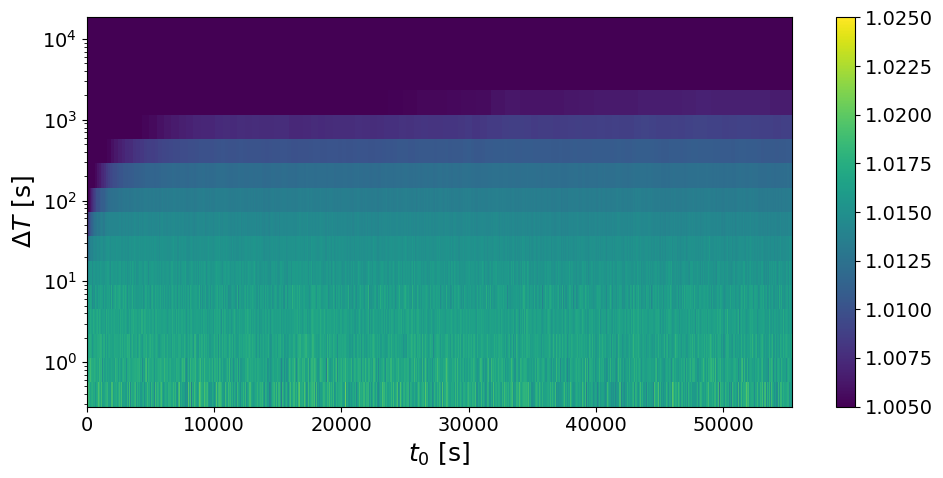

In [ ]:
############################
vmin, vmax = 1.005, 1.02
lower_mt = 8
filter_layer = 12
############################

XPCS.plot_G2tmt(G2tmt, itime, vmin, vmax, yscale='log', lower_mt=lower_mt, filter_layer=filter_layer)

In [ ]:
cut1 = XPCS.cut_G2tmt(itime, G2tmt, tmin=None, tmax=3000)
cut2 = XPCS.cut_G2tmt(itime, G2tmt, tmin=3000, tmax=6000)
cut3 = XPCS.cut_G2tmt(itime, G2tmt, tmin=6000, tmax=15000)
cut4 = XPCS.cut_G2tmt(itime, G2tmt, tmin=15000, tmax=30000)
cut5 = XPCS.cut_G2tmt(itime, G2tmt, tmin=30000, tmax=60000)
t_mt_1, g2_mt_1, dg2_mt_1 = XPCS.get_g2mt(itime, cut1)
t_mt_2, g2_mt_2, dg2_mt_2 = XPCS.get_g2mt(itime, cut2)
t_mt_3, g2_mt_3, dg2_mt_3 = XPCS.get_g2mt(itime, cut3)
t_mt_4, g2_mt_4, dg2_mt_4 = XPCS.get_g2mt(itime, cut4)
t_mt_5, g2_mt_5, dg2_mt_5 = XPCS.get_g2mt(itime, cut5)

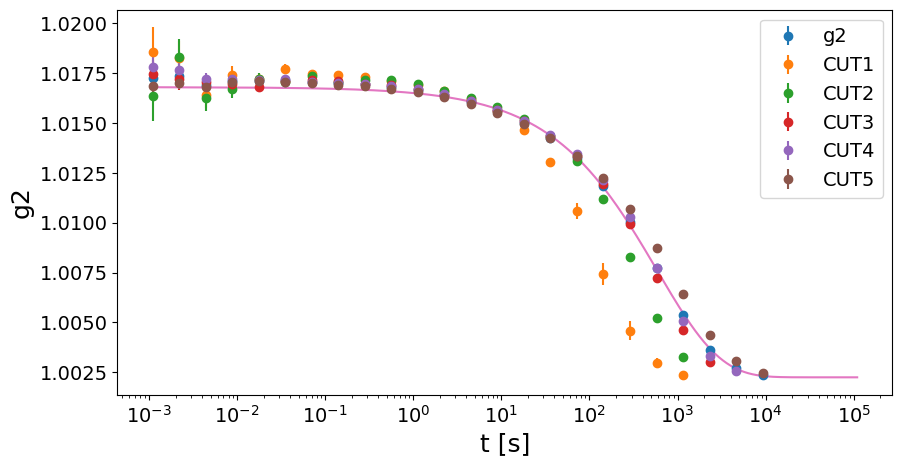

tau = 587.6658091168835 +/- 20.1559778137467
beta = 0.6089817925833586 +/- 0.016188833997585438
c = 0.01455939185484264 +/- 0.00017382499033432498
y0 = 1.002245684046683 +/- 0.00011472650347059915


In [ ]:
##################
t1_fit = 1
t2_fit = 1e8
##################

plt.figure(figsize=(10,5))
plt.errorbar(t_mt, g2_mt, yerr=dg2_mt, fmt='o', label='g2')
plt.errorbar(t_mt_1, g2_mt_1, yerr=dg2_mt_1, fmt='o', label='CUT1')
plt.errorbar(t_mt_2, g2_mt_2, yerr=dg2_mt_2, fmt='o', label='CUT2')
plt.errorbar(t_mt_3, g2_mt_3, yerr=dg2_mt_3, fmt='o', label='CUT3')
plt.errorbar(t_mt_4, g2_mt_4, yerr=dg2_mt_4, fmt='o', label='CUT4')
plt.errorbar(t_mt_5, g2_mt_5, yerr=dg2_mt_5, fmt='o', label='CUT5')


popt, pcov = curve_fit(decorrelation_f, t_mt[(t1_fit<t_mt)*(t_mt<t2_fit)], g2_mt[(t1_fit<t_mt)*(t_mt<t2_fit)], p0=[1000, .8, .04, 1], bounds=([0, 0, 0, .9999], [np.inf, np.inf, np.inf, 1.1]))
x = np.arange(np.min(t_mt), np.max(t_mt)+1e5, 1e-2)
y = decorrelation_f(x, *popt)
plt.plot(x, y,)

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.legend()
plt.show()


print(f'tau = {popt[0]} +/- {np.sqrt(pcov[0,0])}')
print(f'beta = {popt[1]} +/- {np.sqrt(pcov[1,1])}')
print(f'c = {popt[2]} +/- {np.sqrt(pcov[2,2])}')
print(f'y0 = {popt[3]} +/- {np.sqrt(pcov[3,3])}')
